In [1]:
import os
import pickle
import random
import sys
import time
import tarfile
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from math import sqrt, ceil
from random import shuffle
from random import randrange
from scipy.ndimage import uniform_filter


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

data_root = '/home/carsmart/Ubuntu/CS231n_2016/'
data_filename = data_root + 'cifar-10-python.tar.gz'
data_path = data_root + 'cifar-10-batches-py'

In [2]:
def maybe_extract(filename, force=False):
    '''Extract the tar.gz file of cifar.'''
    if os.path.isdir(data_path) and not force:
        # You may override by setting force=True.
        print('%s already present - Skipping extraction of %s.' % (data_path, filename))
    else:
        print('Extracting data for %s. This may take a while. Please wait.' % data_path)
        tar = tarfile.open(filename)
        sys.stdout.flush()
        tar.extractall(data_root)
        tar.close()

maybe_extract(data_filename)

/home/carsmart/Ubuntu/CS231n_2016/cifar-10-batches-py already present - Skipping extraction of /home/carsmart/Ubuntu/CS231n_2016/cifar-10-python.tar.gz.


In [3]:
def load_CIFAR_batch(filename):
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding = 'bytes')
        x = datadict[b'data']
        y = datadict[b'labels']
        x = x.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype('float')
        y = np.array(y)
    return x, y

x_train_1, y_train_1 = load_CIFAR_batch(os.path.join(data_path, 'data_batch_1'))
x_train_1.shape

def load_CIFAR10(ROOT):
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b,))
        x, y = load_CIFAR_batch(f)
        xs.append(x)
        ys.append(y)
    xtr = np.concatenate(xs)
    ytr = np.concatenate(ys)
    del x, y
    xte, yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return xtr, ytr, xte, yte

x_train, y_train, x_test, y_test = load_CIFAR10(data_path)
print('Training data shape: ', x_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', x_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [4]:
def unpickle(file):
    '''Load single batch of cifar.'''
    with open(file, 'rb') as f:
        dict = pickle.load(f, encoding = 'bytes')
    return dict
train_data_1 = unpickle(os.path.join(data_path, 'data_batch_1'))

In [5]:
def load_CIFAR10(data_path):
    '''Load all the data.'''
    xs = []
    ys = []
    for b in range(1, 6):
        train_data_path = os.path.join(data_path, 'data_batch_%d' % b)
        train_data = unpickle(train_data_path)
        xs.append(train_data[b'data'])
        ys.append(train_data[b'labels'])
    x_train = np.concatenate(xs)
    x_train = x_train.reshape(x_train.shape[0], 3, 32, 32).transpose(0, 2, 3, 1).astype('float')
    y_train = np.concatenate(ys)
    del train_data, xs, ys
    test_data_path = os.path.join(data_path, 'test_batch')
    test_data = unpickle(test_data_path)
    x_test = test_data[b'data']
    x_test = x_test.reshape(x_test.shape[0], 3, 32, 32).transpose(0, 2, 3, 1).astype('float')
    y_test = np.array(test_data[b'labels'])
    del test_data
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = load_CIFAR10(data_path)
label_names = unpickle(os.path.join(data_path, 'batches.meta'))
print('Training data shape: ', x_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', x_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


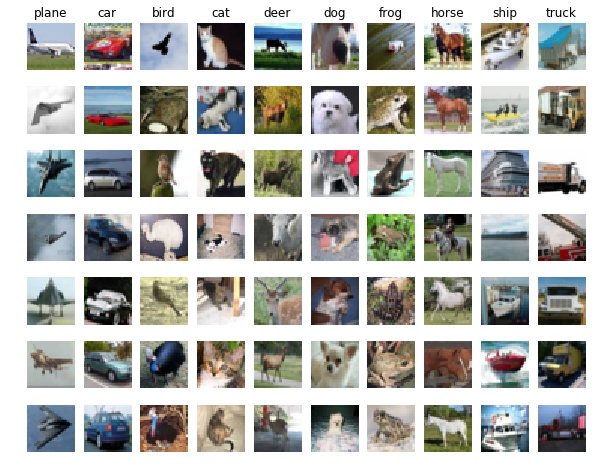

In [6]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace = False)
    for  i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

## Nearest Neighbor

In [ ]:
x_train_rows = x_train.reshape(x_train.shape[0], 32 * 32 * 3)
x_test_rows = x_test.reshape(x_test.shape[0], 32 * 32 * 3)

In [6]:
class NearestNeighbor(object):
    def __init__(self):
        pass
    
    def train(self, X, y):
        self.Xtr = X
        self.ytr = y
    
    def predict(self, X):
        num_test = X.shape[0]
        Ypred = np.zeros(num_test, dtype = self.ytr.dtype)
        for i in range(num_test):
            distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)
            min_index = np.argmin(distances)
            Ypred[i] = self.ytr[min_index]
        return Ypred

nn = NearestNeighbor()
nn.train(x_train_rows, y_train)
%time predict_test = nn.predict(x_test_rows[:1000,:])
print('Accuracy:%f' % (np.mean(predict_test == y_test[:1000])))

CPU times: user 7min 19s, sys: 3min 11s, total: 10min 30s
Wall time: 10min 30s
Accuracy:0.404000


In [7]:
class NearestNeighbor(object):
    def __init__(self):
        pass
    
    def train(self, X, y):
        self.Xtr = X
        self.ytr = y
    
    def predict(self, X):
        num_test = X.shape[0]
        Ypred = np.zeros(num_test, dtype = self.ytr.dtype)
        for i in range(num_test):
            distances = np.sqrt(np.sum(np.square(self.Xtr - X[i,:]), axis = 1))
            min_index = np.argmin(distances)
            Ypred[i] = self.ytr[min_index]
        return Ypred

nn = NearestNeighbor()
nn.train(x_train_rows, y_train)
%time predict_test = nn.predict(x_test_rows[:1000,:])
print('Accuracy:%f' % (np.mean(predict_test == y_test[:1000])))

CPU times: user 7min 21s, sys: 3min 9s, total: 10min 30s
Wall time: 10min 30s
Accuracy:0.353000


## KNN

In [ ]:
num_training = 5000
mask = range(num_training)
x_train = x_train[mask]
y_train = y_train[mask]

num_test = 500
mask = range(num_test)
x_test = x_test[mask]
y_test = y_test[mask]

x_train = x_train.reshape([x_train.shape[0], -1])
x_test = x_test.reshape([x_test.shape[0], -1])
print(x_train.shape, x_test.shape)

In [12]:
class KNearestNeighbor(object):
    '''a KNN classifier with L2 distance'''
    def __init__(self):
        pass
    
    def train(self, x, y):
        '''
        Train the classifier. For k-nearest neighbors this is just memorizing the training data.
        Inputs:
        -x:A numpy array of shape (num_train, D) containing the containing data consisting of 
           num_train_samples each of dimension D.
        -y:A numpy array shape (N,) containing the training labels, where y[i] is th lable for x[i].
        '''
        self.x_train = x
        self.y_train = y
    
    def predict(self, x, k = 1, num_loops = 0):
        '''
        predict labels for test data using this classifier.
        Inputs:
        -x:A numpy array of shape (num_test, D) containing test data consisting of num_test samples
           each of dimension D.
        -k:The number of nearest neighbors that vote for the perdicted labels.
        Returns:
        -y:A numpy array of shape (num_test,) containing predicted labels for the test data, where y[i]
           is the predicted label for the test point x[i].
        '''
        if num_loops == 0:
            dists = self.compute_distances_no_loops(x)
        elif num_loops == 1:
            dists = self.compute_distances_one_loop(x)
        elif num_loops == 2:
            dists = self.compute_distances_two_loops(x)
        else:
            raise ValueError('Invalid value %d for num_loops' % num_loops)
        
        return self.predict_labels(dists, k = k)
    
    def compute_distances_two_loops(self, x):
        '''
        Compute the distance between each test point in x and each training point in self.x_train using 
        a nested loop over both the training data and the test data.
        Inputs:
        -x:A numpy array of shape (num_test, D) containing test data.
        Returns:
        -dists:A numpy array of shape (num_test, num_train) where dists[i,j] is the Euclidean distance
               between the ith test point and the jth training point.
        '''
        num_test = x.shape[0]
        num_train = self.x_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train):
                dists[i, j] = np.sqrt(np.sum(np.square(x[i,:] - self.x_train[j,:])))
        return dists
    
    def compute_distances_one_loop(self, x):
        '''
        Compute the distance between each test point in x and each training point in self.x_train using a
        single loop over the test data.
        Input/Output: Same as compute_distances_two_loops
        '''
        num_test = x.shape[0]
        num_train = self.x_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            dists[i,:] = np.sqrt(np.sum(np.square(self.x_train - x[i, :]), axis = 1))
        return dists
    
    def compute_distances_no_loops(self, x):
        '''
        Compute the distance between each test point in x and each training point in self.x_train using no 
        explicit loops.
        Input/Output: Same as compute_distances_two_loops
        '''
        num_test = x.shape[0]
        num_train = self.x_train.shape[0]
        #dists = np.zeros((num_test, num_train))
        dists = np.sqrt(np.sum(np.square(x), axis = 1)[:, np.newaxis] + 
                        np.sum(np.square(self.x_train.T), axis = 0)[np.newaxis, :] -
                        2 * x.dot(self.x_train.T))
        #dists = np.sqrt(np.sum(np.square(x[:,np.newaxis] - self.x_train), axis = 2))
        return dists
    
    def predict_labels(self, dists, k = 1):
        '''
        Given a matrix of distances between test points and training points, predict a label for each test 
        point.
        Inputs:
        -dists:A numpy array of shape (num_test, num_train) where dists[i,j] gives the distance between the 
               ith test point and the jth training points.
        Returns:
        -y:A numpy array of shape (num_test,) containing predicted labels for the test data, where y[i] is the 
           predicted label for the test point x[i].
        '''
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = self.y_train[np.argsort(dists[i,:])[:k]]
            y_pred[i] = Counter(closest_y).most_common(1)[0][0]
        return y_pred     

(500, 5000)


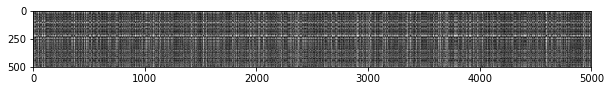

In [13]:
nn = KNearestNeighbor()
nn.train(x_train, y_train)

dists = nn.compute_distances_two_loops(x_test)
print(dists.shape)

plt.imshow(dists, interpolation = 'none')
plt.show()

In [14]:
y_test_pred = nn.predict_labels(dists, k = 1)

num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d corrrct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 137 / 500 corrrct => accuracy: 0.274000


In [15]:
y_test_pred = nn.predict_labels(dists, k = 5)

num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d corrrct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 142 / 500 corrrct => accuracy: 0.284000


In [19]:
dists_one = nn.compute_distances_one_loop(x_test)

difference = np.linalg.norm(dists - dists_one, ord = 'fro')
print('Difference was: %f' % (difference,))
if difference < 0.01:
    print('Good!The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

Difference was: 0.000000
Good!The distance matrices are the same


In [20]:
dists_two = nn.compute_distances_no_loops(x_test)

difference = np.linalg.norm(dists - dists_two, ord = 'fro')
print('Difference was: %f' % (difference,))
if difference < 0.01:
    print('Good!The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

Difference was: 0.000000
Good!The distance matrices are the same


In [9]:
nn = KNearestNeighbor()
nn.train(x_train, y_train)
%time predict_test = nn.predict(x_test, k = 10, num_loops = 0)
print('Accuracy:%f' % (np.mean(predict_test == y_test)))

CPU times: user 1.8 s, sys: 1.4 s, total: 3.2 s
Wall time: 423 ms
Accuracy:0.278000


In [10]:
nn = KNearestNeighbor()
nn.train(x_train, y_train)
%time predict_test = nn.predict(x_test, k = 10, num_loops = 1)
print('Accuracy:%f' % (np.mean(predict_test == y_test)))

CPU times: user 22.6 s, sys: 9.86 s, total: 32.5 s
Wall time: 32.5 s
Accuracy:0.278000


In [11]:
nn = KNearestNeighbor()
nn.train(x_train, y_train)
%time predict_test = nn.predict(x_test, k = 10, num_loops = 2)
print('Accuracy:%f' % (np.mean(predict_test == y_test)))

CPU times: user 33.5 s, sys: 0 ns, total: 33.5 s
Wall time: 33.5 s
Accuracy:0.278000


In [21]:
def time_function(f, *args):
    '''
    Call a function f with args and return the time (in seconds) that it took to execute.
    '''
    import time
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc - tic

two_loop_time = time_function(nn.compute_distances_two_loops, x_test)
print('Two loop version took %f seconds.' % two_loop_time)

one_loop_time = time_function(nn.compute_distances_one_loop, x_test)
print('One loop version took %f seconds.' % one_loop_time)

no_loop_time = time_function(nn.compute_distances_no_loops, x_test)
print('No loop version took %f secondd.' % no_loop_time)

Two loop version took 34.535403 seconds.
One loop version took 32.231350 seconds.
No loop version took 0.197763 secondd.


## Cross-Validation

In [100]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

x_train_folds = []
y_train_folds = []

def randomize(x_train, y_train, num_folds):
    permutation = np.random.permutation(x_train.shape[0])
    x_train_shuffled = x_train[permutation, :]
    y_train_shuffled = y_train[permutation]
    x_train_folds = np.array_split(x_train_shuffled, num_folds)
    y_train_folds = np.array_split(y_train_shuffled, num_folds)
    return x_train_folds, y_train_folds

x_train_folds, y_train_folds = randomize(x_train, y_train, num_folds)


k_to_accuracies = {}

tic = time.time()

for i in range(num_folds):
    x_train_fold = np.concatenate(x_train_folds[:i] + x_train_folds[i + 1:])
    y_train_fold = np.concatenate(y_train_folds[:i] + y_train_folds[i + 1:])
    
    x_test_fold = x_train_folds[i]
    y_test_fold = y_train_folds[i]
    
    nn = KNearestNeighbor()
    nn.train(x_train_fold, y_train_fold)
    for k in k_choices:
        predict_test = nn.predict(x_test_fold, k = k, num_loops = 0)
        if not k in k_to_accuracies:
            k_to_accuracies[k] = [np.mean(predict_test == y_test_fold)]
        else:
            k_to_accuracies[k].append(np.mean(predict_test == y_test_fold))

toc = time.time()
print(toc - tic)
            
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

26.97196865081787
k = 1, accuracy = 0.269000
k = 1, accuracy = 0.264000
k = 1, accuracy = 0.259000
k = 1, accuracy = 0.266000
k = 1, accuracy = 0.284000
k = 3, accuracy = 0.266000
k = 3, accuracy = 0.232000
k = 3, accuracy = 0.255000
k = 3, accuracy = 0.237000
k = 3, accuracy = 0.286000
k = 5, accuracy = 0.282000
k = 5, accuracy = 0.263000
k = 5, accuracy = 0.247000
k = 5, accuracy = 0.253000
k = 5, accuracy = 0.294000
k = 8, accuracy = 0.303000
k = 8, accuracy = 0.267000
k = 8, accuracy = 0.271000
k = 8, accuracy = 0.272000
k = 8, accuracy = 0.286000
k = 10, accuracy = 0.290000
k = 10, accuracy = 0.262000
k = 10, accuracy = 0.278000
k = 10, accuracy = 0.259000
k = 10, accuracy = 0.295000
k = 12, accuracy = 0.296000
k = 12, accuracy = 0.274000
k = 12, accuracy = 0.267000
k = 12, accuracy = 0.265000
k = 12, accuracy = 0.294000
k = 15, accuracy = 0.293000
k = 15, accuracy = 0.262000
k = 15, accuracy = 0.272000
k = 15, accuracy = 0.262000
k = 15, accuracy = 0.278000
k = 20, accuracy = 0.2

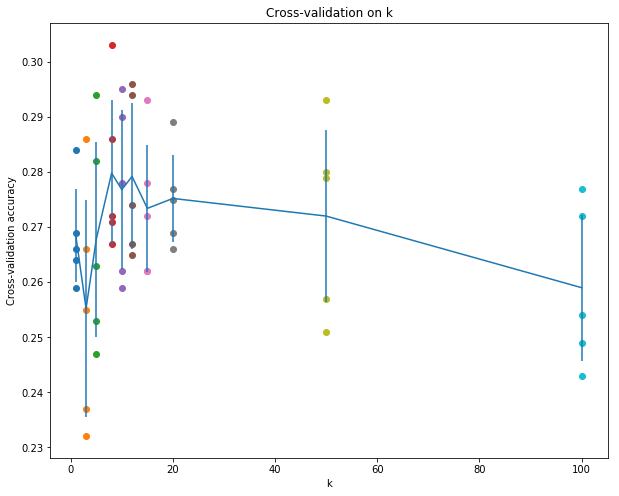

In [101]:
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

accuracies_mean = np.array([np.mean(v) for k, v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k, v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr = accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [106]:
best_k = k_choices[np.argmax(accuracies_mean)]

nn = KNearestNeighbor()
nn.train(x_train, y_train)
predict_test = nn.predict(x_test, k = best_k)

num_correct = np.sum(predict_test == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 138 / 500 correct => accuracy: 0.276000


## SVM

In [66]:
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

#Validation set.
maks = range(num_training, num_training + num_validation)
x_val = x_train[mask]
y_val = y_train[mask]

#Training set.
mask = range(num_training)
x_train = x_train[mask]
y_train = y_train[mask]

#Development set.
mask = np.random.choice(num_training, num_dev, replace = False)
x_dev = x_train[mask]
y_dev = y_train[mask]

#Test set.
mask = range(num_test)
x_test = x_test[mask]
y_test = y_test[mask]

print('Training data shape:', x_train.shape)
print('Training labels shape:', y_train.shape)
print('Validation data shape:', x_val.shape)
print('Validation labels shape:', y_val.shape)
print('Test data shape:', x_test.shape)
print('Test labels shape:', y_test.shape)

Training data shape: (49000, 32, 32, 3)
Training labels shape: (49000,)
Validation data shape: (1000, 32, 32, 3)
Validation labels shape: (1000,)
Test data shape: (1000, 32, 32, 3)
Test labels shape: (1000,)


In [67]:
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_val = np.reshape(x_val, (x_val.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))
x_dev = np.reshape(x_dev, (x_dev.shape[0], -1))

print('Training data shape:', x_train.shape)
print('Validation data shape:', x_val.shape)
print('Test data shape:', x_test.shape)
print('Dev data shape:', x_dev.shape)

Training data shape: (49000, 3072)
Validation data shape: (1000, 3072)
Test data shape: (1000, 3072)
Dev data shape: (500, 3072)


### Substract the mean image

[ 130.64189796  135.98173469  132.47391837  130.05569388  135.34804082
  131.75402041  130.96055102  136.14328571  132.47636735  131.48467347]


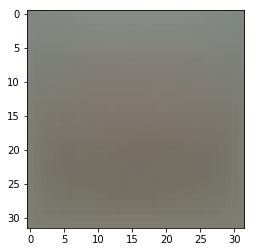

In [68]:
#Step 1:compute the image mean based on the training set.
mean_image = np.mean(x_train, axis = 0)
print(mean_image[:10])
plt.figure(figsize = (4,4))
plt.imshow(mean_image.reshape(32,32,3).astype('uint8'))
plt.show()

In [69]:
#Step 2:subtract the mean image from train and test data
x_train -= mean_image
x_val -= mean_image
x_test -= mean_image
x_dev -= mean_image

In [83]:
#Step 3:bias trick
x_train = np.hstack([x_train, np.ones((x_train.shape[0], 1))])
x_val = np.hstack([x_val, np.ones((x_val.shape[0], 1))])
x_test = np.hstack([x_test, np.ones((x_test.shape[0], 1))])
x_dev = np.hstack([x_dev, np.ones((x_dev.shape[0], 1))])

print(x_train.shape, x_val.shape, x_test.shape, x_dev.shape)

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


### SVM Classifier

Compute loss for svm using stacked loops, and check the gradients of some dimensions.

In [140]:
def svm_loss_naive(W, x, y, reg):
    '''
    Structured SVM loss function, naive impementation (with loops).
    Inputs have dimension D, there are C classes, and we oprate on minibatches of N examples.
    Inputs:
    -W: A numpy array of shape (D, C) containing weights.
    -x: A numpy array of shape (N, D) containing a minibatch of data.
    -y: A numpy array of shape (N, ) containing labels.
    -reg: (float) regularization strength.
    Returns:
    - loss as a single float.
    - gradient with respect to weights W; an array of same shape as W
    '''
    dW = np.zeros(W.shape)
    
    #compute the loss and the gradient
    num_classes = W.shape[1]
    num_train = x.shape[0]
    loss = 0.0
    for i in range(num_train):
        scores = x[i].dot(W)
        correct_class_score = scores[y[i]]
        for j in range(num_classes):
            if j == y[i]:
                continue
            margin = scores[j] - correct_class_score + 1
            if margin > 0:
                loss += margin
                dW[:, j] += x[i]
                dW[:, y[i]] -= x[i]
    
    loss /= num_train
    dW /= num_train
    
    loss += 0.5 * reg * np.sum(W * W)
    dW += reg * W
    
    return loss, dW

In [141]:
import time
W = np.random.randn(3073, 10) * 0.0001

loss, grad = svm_loss_naive(W, x_dev, y_dev, 0.00001)
print('loss:%f' % (loss, ))
print('grad: ', grad)

loss:8.650450
grad:  [[ -1.14118782e+01  -3.45509400e+00  -2.33782453e+00 ...,   8.90955416e+00
   -1.43243098e+01  -3.74022167e+01]
 [ -2.23304018e+01  -1.70179000e+00  -2.95337898e+00 ...,   5.84367122e+00
   -3.17411782e+01  -4.16626849e+01]
 [ -4.30135738e+01  -4.05755600e+00   1.15618868e+01 ...,   6.76853053e+00
   -5.70075382e+01  -4.97581221e+01]
 ..., 
 [ -7.88503690e+00  -1.23752800e+00  -1.38130661e+00 ...,  -5.56484736e-01
    2.37739809e+01  -7.16406106e+00]
 [ -2.42032094e+01  -1.02888420e+01   1.30241457e+00 ...,   1.62991923e+01
   -2.60847457e+00  -4.99876914e+00]
 [ -2.20000005e-02  -9.79999998e-02   3.39999991e-02 ...,  -1.80000014e-02
   -1.74000000e-01   7.20000016e-02]]


In [142]:
from random import randrange
def grad_check_sparse(f, x, analytic_grad, num_checks = 10, h = 1e-5):
    '''
    sample a few random elements and only return numerical in this dimensions.
    '''
    for i in range(num_checks):
        ix = tuple([randrange(m) for m in x.shape])
        
        oldval = x[ix]
        x[ix] = oldval + h
        fxph = f(x)
        x[ix] = oldval - h
        fxmh = f(x)
        x[ix] = oldval
        
        grad_numerical = (fxph - fxmh) / (2 * h)
        grad_analytic = analytic_grad[ix]
        rel_error = abs(grad_numerical - grad_analytic) / (abs(grad_numerical) + abs(grad_analytic))
        print('numeircal:%f analytic:%f, relative error:%e' % (grad_numerical, grad_analytic, rel_error))

In [143]:
loss, grad = svm_loss_naive(W, x_dev, y_dev, 0.0)

f = lambda w:svm_loss_naive(w, x_dev, y_dev, 0.0)[0]
grad_numeical = grad_check_sparse(f, W, grad)

numeircal:-37.187789 analytic:-37.187789, relative error:6.869116e-12
numeircal:14.743881 analytic:14.743881, relative error:1.375471e-12
numeircal:-2.249744 analytic:-2.249744, relative error:5.104489e-11
numeircal:-3.073320 analytic:-3.073320, relative error:1.353091e-10
numeircal:11.583360 analytic:11.583360, relative error:1.995460e-11
numeircal:8.853549 analytic:8.853549, relative error:5.943996e-12
numeircal:-8.215922 analytic:-8.215922, relative error:3.211137e-12
numeircal:-43.687170 analytic:-43.687170, relative error:4.394054e-12
numeircal:5.009284 analytic:5.009284, relative error:1.314089e-11
numeircal:10.451503 analytic:10.451503, relative error:5.402237e-11


In [144]:
loss, grad = svm_loss_naive(W, x_dev, y_dev, 1e2)
f = lambda w:svm_loss_naive(w, x_dev, y_dev, 1e2)[0]
grad_numeical = grad_check_sparse(f, W, grad)

numeircal:-11.260139 analytic:-11.260139, relative error:1.300945e-11
numeircal:17.879325 analytic:17.879325, relative error:1.928930e-12
numeircal:-7.985214 analytic:-7.985214, relative error:2.585381e-12
numeircal:-27.511958 analytic:-27.511958, relative error:1.733771e-11
numeircal:7.076920 analytic:7.076920, relative error:5.162149e-12
numeircal:-2.239207 analytic:-2.239207, relative error:1.077723e-10
numeircal:19.140008 analytic:19.140008, relative error:1.893156e-11
numeircal:-30.216744 analytic:-30.216744, relative error:1.608587e-11
numeircal:15.006901 analytic:15.006901, relative error:6.132005e-12
numeircal:-56.646276 analytic:-56.646276, relative error:1.344036e-12


Compute loss for svm using vectorized method, and compare the time cost.

In [34]:
def svm_loss_vectorized(W, x, y, reg):
    '''
    Structured SVM loss function, vectorized implementation.
    Inputs and outputs are the same as svm_loss_naive.
    '''
    loss = 0.0
    dW = np.zeros(W.shape)
    
    num_classes = W.shape[1]
    num_train = x.shape[0]
    
    scores = x.dot(W)
    margin = scores - scores[range(num_train), y][:, np.newaxis] + 1
    margin[margin < 0] = 0
    margin[range(num_train), y] = 0
    
    loss = np.sum(margin)
    
    dW_data = margin
    dW_data[dW_data > 0] = 1
    row_sum = np.sum(dW_data, axis = 1)
    dW_data[range(num_train), y] = -row_sum
    
    dW = np.dot(dW_data.T, x).T
    
    loss /= num_train
    dW /= num_train
    
    loss += 0.5 * reg * np.sum(W * W)
    dW += reg * W
    
    return loss, dW

In [169]:
tic = time.time()
loss_naive, grad_naive = svm_loss_naive(W, x_dev, y_dev, 0.00001)
toc = time.time()
print('Naive loss: %e computed in %fs' % (loss_naive, toc - tic))

tic = time.time()
loss_vectorized, grad_vectorized = svm_loss_vectorized(W, x_dev, y_dev, 0.00001)
toc = time.time()
print('Vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord = 'fro')
print('Difference of loss: %g' % (loss_naive - loss_vectorized))
print('Difference of grad: %g' % difference)

Naive loss: 8.650450e+00 computed in 0.291552s
Vectorized loss: 8.650450e+00 computed in 0.011384s
Difference of loss: -8.88178e-15
Difference of grad: 1.16044e-11


In [160]:
f = lambda w:svm_loss_naive(w, x_dev, y_dev, 0.0)[0]
grad_numeical = grad_check_sparse(f, W, grad_vectorized)

numeircal:-27.042633 analytic:-27.042633, relative error:1.265459e-11
numeircal:-3.383516 analytic:-3.383516, relative error:5.454541e-11
numeircal:2.051186 analytic:2.051186, relative error:9.058351e-10
numeircal:6.225048 analytic:6.225048, relative error:6.482511e-11
numeircal:20.709183 analytic:20.709183, relative error:1.071852e-11
numeircal:-1.314504 analytic:-1.314504, relative error:1.436275e-11
numeircal:16.920810 analytic:16.920810, relative error:3.259490e-11
numeircal:19.900407 analytic:19.900407, relative error:1.599117e-11
numeircal:-1.785089 analytic:-1.785089, relative error:1.489494e-10
numeircal:20.687327 analytic:20.687327, relative error:3.005127e-11


### Stochastic Gradient Descent

In [35]:
class LinearClassifier(object):
    def __init__(self):
        self.W = None
    
    def train(self, x, y, learning_rate = 1e-3, reg = 1e-5, num_iters = 100, batch_size = 200, verbose = False):
        '''
        Train this linear classifier using SGD.
        Inputs:
        -x: A numpy array of shape (N, D) containing training data;  there are N training samples 
            each of dimension D.
        -y: A numpy array of shape (N, ) containing training labels.
        -learning_rate: (float) learing rate for optimization.
        -num_iters: (integer) number of steps to take when optimizing.
        -batch_size: (integer) number of training examples to use at each step.
        -verbose: (boolean) if True, print progress duringoptimization.
        '''
        num_train, dim = x.shape
        num_classes = np.max(y) + 1
        if self.W is None:
            self.W = 0.001 * np.random.randn(dim, num_classes)
        
        loss_history = []
        for it in range(num_iters):
            batch_choice = np.random.choice(num_train, batch_size, replace = True)
            x_batch = x[batch_choice, :]
            y_batch = y[batch_choice]

            loss, grad = self.loss(x_batch, y_batch, reg)
            loss_history.append(loss)
            
            self.W -= learning_rate * grad
            
            if verbose and it % 100 == 0:
                print('Iteration %d / %d:loss %f' % (it, num_iters, loss))
        return loss_history
    
    def predict(self, x):
        '''
        Use the trained weights of this linear classifier to predict labels for data points.
        Inputs:
        -x: N x D array of training data. Each row is a D-dimensional point.
        Returns:
        -y_pred: Predicted labels for the data in x. y_pred is a 1-dimensional array of length
                 N, and each element is an integer giving the predicted class.
        '''
        y_pred = np.argmax(np.dot(x, self.W), axis = 1)
        
        return y_pred
    
    def loss(self, x_batch, y_batch, reg):
        '''
        Compute the loss function and its derivative.
        Subclasses will override this.
        Inputs:
        -x_batch: A numpy array of shape (N, D) containing a mini-batch of N data points; each
                  pointhas dimension D. 
        -y_batch: A numpy array of shape (N, ) containing labels for the mini-batch.
        reg: (float) regularization strength.
        Returns: A tuple containing:
        - loss as a single float
        - gradient with respect to self.W; an array of the same shape as W.
        '''
        pass

In [36]:
class LinearSVM(LinearClassifier):
    '''A subclass that uses the Multiclass SVM loss function.'''
    def loss(self, x_batch, y_batch, reg):
        return svm_loss_vectorized(self.W, x_batch, y_batch, reg)

In [209]:
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(x_train, y_train, learning_rate = 1e-7, reg = 5e+4, num_iters = 1500, verbose = True)
toc = time.time()
print('That took %fs' % (toc - tic))

Iteration 0 / 1500:loss 789.552469
Iteration 100 / 1500:loss 288.056920
Iteration 200 / 1500:loss 108.373535
Iteration 300 / 1500:loss 42.413884
Iteration 400 / 1500:loss 18.595335
Iteration 500 / 1500:loss 10.339635
Iteration 600 / 1500:loss 7.177196
Iteration 700 / 1500:loss 5.620999
Iteration 800 / 1500:loss 5.997317
Iteration 900 / 1500:loss 5.300604
Iteration 1000 / 1500:loss 5.600172
Iteration 1100 / 1500:loss 5.541201
Iteration 1200 / 1500:loss 4.733768
Iteration 1300 / 1500:loss 5.244612
Iteration 1400 / 1500:loss 4.798592
That took 5.404083s


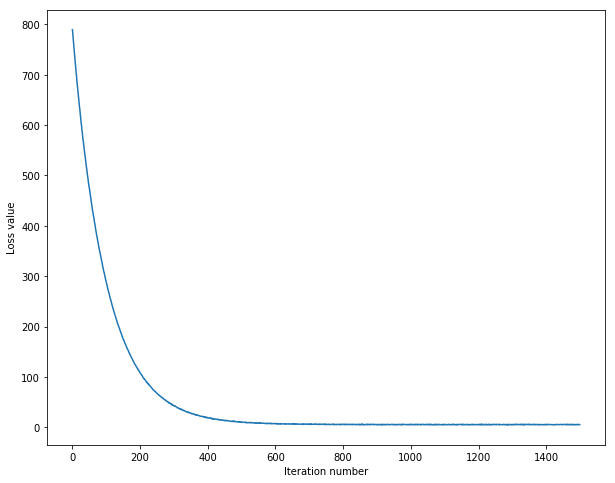

In [210]:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [211]:
y_train_pred = svm.predict(x_train)
print('Training accuracy: %f' % (np.mean(y_train == y_train_pred)))

y_val_pred = svm.predict(x_val)
print('Validation accuracy: %f' % (np.mean(y_val == y_val_pred)))

Training accuracy: 0.369449
Validation accuracy: 0.373000


### Cross-Validation

In [223]:
learning_rates = [1e-7, 2e-7, 4e-7, 7e-7, 1e-6, 2e-6, 3e-6]
regularization_strengths = [1e4, 2e4, 4e4, 6e4, 8e4, 1e5]

results = {}
best_val = -1
best_svm = None

for lr in learning_rates:
    for reg in regularization_strengths:
        svm = LinearSVM()
        svm.train(x_train, y_train, learning_rate = lr, reg = reg, num_iters = 1500, verbose = True)
        
        y_train_pred = svm.predict(x_train)
        y_val_pred = svm.predict(x_val)
        
        accuracy_train = np.mean(y_train == y_train_pred)
        accuracy_val = np.mean(y_val == y_val_pred)
        
        results[(lr, reg)] = (accuracy_train, accuracy_val)
        
        if accuracy_val > best_val:
            best_val = accuracy_val
            best_svm = svm


for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (lr, reg, train_accuracy, val_accuracy))
    
print('Best validation accuracy achieved during cross-validation: %f' % best_val)

Iteration 0 / 1500:loss 174.879144
Iteration 100 / 1500:loss 135.952704
Iteration 200 / 1500:loss 110.656440
Iteration 300 / 1500:loss 90.837054
Iteration 400 / 1500:loss 74.501764
Iteration 500 / 1500:loss 61.734758
Iteration 600 / 1500:loss 50.776408
Iteration 700 / 1500:loss 42.273675
Iteration 800 / 1500:loss 35.490673
Iteration 900 / 1500:loss 29.725581
Iteration 1000 / 1500:loss 25.365726
Iteration 1100 / 1500:loss 21.864081
Iteration 1200 / 1500:loss 18.204925
Iteration 1300 / 1500:loss 15.895647
Iteration 1400 / 1500:loss 13.702878
Iteration 0 / 1500:loss 324.903162
Iteration 100 / 1500:loss 212.544946
Iteration 200 / 1500:loss 142.266364
Iteration 300 / 1500:loss 96.576751
Iteration 400 / 1500:loss 65.985147
Iteration 500 / 1500:loss 45.700771
Iteration 600 / 1500:loss 31.242442
Iteration 700 / 1500:loss 22.692868
Iteration 800 / 1500:loss 16.590984
Iteration 900 / 1500:loss 12.468438
Iteration 1000 / 1500:loss 10.274815
Iteration 1100 / 1500:loss 8.671049
Iteration 1200 / 150

Iteration 500 / 1500:loss 6.009554
Iteration 600 / 1500:loss 5.985531
Iteration 700 / 1500:loss 5.042853
Iteration 800 / 1500:loss 6.136860
Iteration 900 / 1500:loss 5.567310
Iteration 1000 / 1500:loss 5.522220
Iteration 1100 / 1500:loss 5.318943
Iteration 1200 / 1500:loss 5.576054
Iteration 1300 / 1500:loss 5.278262
Iteration 1400 / 1500:loss 5.429921
Iteration 0 / 1500:loss 1261.539054
Iteration 100 / 1500:loss 7.699436
Iteration 200 / 1500:loss 5.053136
Iteration 300 / 1500:loss 6.469206
Iteration 400 / 1500:loss 6.168709
Iteration 500 / 1500:loss 5.914251
Iteration 600 / 1500:loss 6.262919
Iteration 700 / 1500:loss 5.949917
Iteration 800 / 1500:loss 5.746262
Iteration 900 / 1500:loss 5.814821
Iteration 1000 / 1500:loss 5.536054
Iteration 1100 / 1500:loss 5.915609
Iteration 1200 / 1500:loss 6.138825
Iteration 1300 / 1500:loss 5.729523
Iteration 1400 / 1500:loss 5.385651
Iteration 0 / 1500:loss 1572.279530
Iteration 100 / 1500:loss 6.486997
Iteration 200 / 1500:loss 5.426065
Iteratio

Iteration 1200 / 1500:loss 9.495558
Iteration 1300 / 1500:loss 7.499316
Iteration 1400 / 1500:loss 7.344682
Iteration 0 / 1500:loss 331.465513
Iteration 100 / 1500:loss 10.359917
Iteration 200 / 1500:loss 9.075205
Iteration 300 / 1500:loss 7.890940
Iteration 400 / 1500:loss 9.056028
Iteration 500 / 1500:loss 10.098451
Iteration 600 / 1500:loss 9.759393
Iteration 700 / 1500:loss 10.240714
Iteration 800 / 1500:loss 8.293135
Iteration 900 / 1500:loss 9.174223
Iteration 1000 / 1500:loss 9.649273
Iteration 1100 / 1500:loss 7.882684
Iteration 1200 / 1500:loss 7.771233
Iteration 1300 / 1500:loss 7.561364
Iteration 1400 / 1500:loss 7.610255
Iteration 0 / 1500:loss 645.414760
Iteration 100 / 1500:loss 10.506449
Iteration 200 / 1500:loss 7.654277
Iteration 300 / 1500:loss 9.529903
Iteration 400 / 1500:loss 11.799811
Iteration 500 / 1500:loss 7.242724
Iteration 600 / 1500:loss 10.024996
Iteration 700 / 1500:loss 9.663997
Iteration 800 / 1500:loss 8.797352
Iteration 900 / 1500:loss 9.680985
Iterat

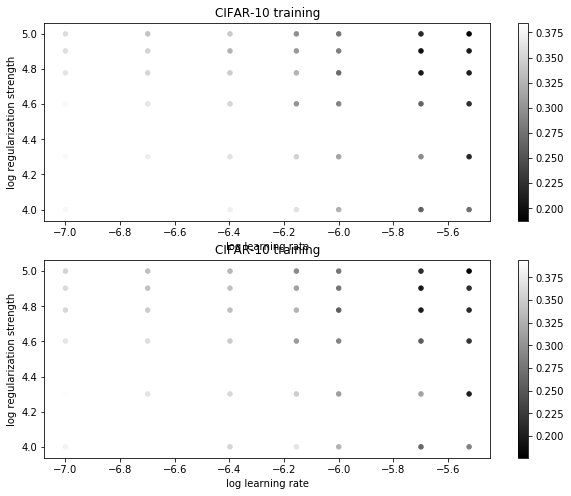

In [227]:
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

marker_size = 20
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c = colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training')

colors = [results[x][1] for x in results]
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c = colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training')
plt.show()

In [228]:
y_test_pred = best_svm.predict(x_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('Linear SVM on raw pixels final test set accuracy: %f' % test_accuracy)

Linear SVM on raw pixels final test set accuracy: 0.385000


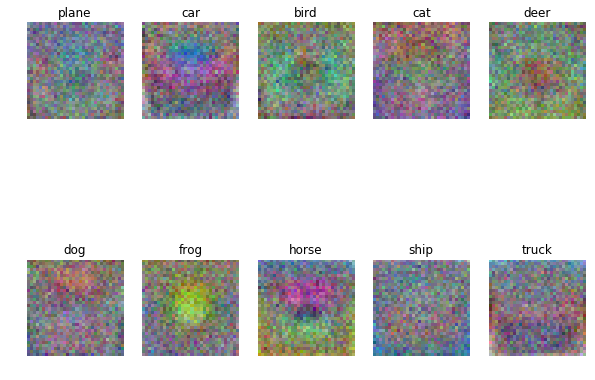

In [231]:
w = best_svm.W[:-1, :]
w = w.reshape(32, 32, 3, 10)
w_min, w_max = np.min(w), np.max(w)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i + 1)
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])

## Softmax

In [233]:
def get_CIFAR10_data(num_training = 49000, num_validation = 1000, num_test = 1000, num_dev = 500):
    '''
    Load the CIFAR-10 dataset form disk and perform preprocessing to prepare it for the linear classifier.
    '''
    cifar10_dir = data_path
    x_train, y_train, x_test , y_test = load_CIFAR10(cifar10_dir)
    
    mask = range(num_training, num_training + num_validation)
    x_val = x_train[mask]
    y_val = y_train[mask]
    
    mask = range(num_training)
    x_train = x_train[mask]
    y_train = y_train[mask]
    
    mask = np.random.choice(num_training, num_dev, replace = False)
    x_dev = x_train[mask]
    y_dev = y_train[mask]
    
    x_train = np.reshape(x_train, (x_train.shape[0], -1))
    x_val = np.reshape(x_val, (x_val.shape[0], -1))
    x_test = np.reshape(x_test, (x_test.shape[0], -1))
    x_dev = np.reshape(x_dev, (x_dev.shape[0], -1))
    
    mean_image = np.mean(x_train, axis = 0)
    x_train -= mean_image
    x_val -= mean_image
    x_test -= mean_image
    x_dev -= mean_image
    
    x_train = np.hstack([x_train, np.ones((x_train.shape[0], 1))])
    x_val = np.hstack([x_val, np.ones((x_val.shape[0], 1))])
    x_test = np.hstack([x_test, np.ones((x_test.shape[0], 1))])
    x_dev = np.hstack([x_dev, np.ones((x_dev.shape[0], 1))])
    
    return x_train, y_train, x_val, y_val, x_test, y_test, x_dev, y_dev

x_train, y_train, x_val, y_val, x_test, y_test, x_dev, y_dev = get_CIFAR10_data()

print('Train data shape:', x_train.shape)
print('Train labels shape:', y_train.shape)
print('Validation data shape:', x_val.shape)
print('Validation labels shape:', y_val.shape)
print('Test data shape:', x_test.shape)
print('Test labels shape:', y_test.shape)
print('Development data shape:', x_dev.shape)
print('Development labels shape:', y_dev.shape)

Train data shape: (49000, 3073)
Train labels shape: (49000,)
Validation data shape: (1000, 3073)
Validation labels shape: (1000,)
Test data shape: (10000, 3073)
Test labels shape: (10000,)
Development data shape: (500, 3073)
Development labels shape: (500,)


### Softmax Classifier

In [263]:
def softmax_loss_naive(W, x, y, reg):
    '''
    Softmax loss function, naive implementation (with loops).
    Inputs have dimension D, there are C classes, and we operate on minibathces of N examples.
    Inputs:
    -W: A numpy array of shape (D, C) containing weights.
    -x: A numpy array of shape (N, D) containing a minibatch of data.
    -y: A numpy array of shape (N, ) containing training labels.
    -reg: (float) regularization strength.
    Returns a tupe of:
    - loss as single float;
    - gradient with respect to weights W; an array of same shape as W.
    '''
    loss = 0.0
    dW = np.zeros_like(W)
    
    num_classes = W.shape[1]
    num_train = x.shape[0]
    
    for i in range(num_train):
        f = x[i].dot(W)
        f -= np.max(f)
        p = np.exp(f) / np.sum(np.exp(f))
        loss -= np.log(p[y[i]])
        for j in range(num_classes):
            if j == y[i]:
                dW[:, j] += (p[j] - 1) * x[i]
            else:
                dW[:, j] += p[j] * x[i]
    
    loss /= num_train
    dW /= num_train
    
    loss += 0.5 *reg * np.sum(W * W)
    dW += reg * W
                
    return loss, dW

W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, x_dev, y_dev, 0.0)

print('Loss: %f' % loss)
print('Sanity check :%f' %(-np.log(0.1)))

Loss: 2.355744
Sanity check :2.302585


In [264]:
loss, grad = softmax_loss_naive(W, x_dev, y_dev, 0.0)

f = lambda w:softmax_loss_naive(w, x_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

loss, grad = softmax_loss_naive(W, x_dev, y_dev, 1e2)
f = lambda w:softmax_loss_naive(w, x_dev, y_dev, 1e2)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numeircal:-1.775074 analytic:-1.775075, relative error:1.376173e-08
numeircal:-1.151191 analytic:-1.151191, relative error:2.184374e-08
numeircal:-0.857679 analytic:-0.857679, relative error:1.651974e-08
numeircal:0.410872 analytic:0.410872, relative error:1.903481e-07
numeircal:-0.090395 analytic:-0.090395, relative error:1.445079e-07
numeircal:-1.927247 analytic:-1.927247, relative error:9.412995e-09
numeircal:-4.771064 analytic:-4.771064, relative error:1.204044e-09
numeircal:-1.272111 analytic:-1.272111, relative error:1.320231e-08
numeircal:-0.738818 analytic:-0.738818, relative error:1.410470e-07
numeircal:-1.995235 analytic:-1.995235, relative error:2.289915e-09
numeircal:2.840593 analytic:2.840592, relative error:5.841848e-09
numeircal:-4.318500 analytic:-4.318500, relative error:1.694585e-08
numeircal:1.707967 analytic:1.707967, relative error:3.674731e-08
numeircal:-3.826257 analytic:-3.826258, relative error:2.009057e-08
numeircal:0.674361 analytic:0.674361, relative error:1

In [286]:
def softmax_loss_vectorized(W, x, y, reg):
    '''
    Softmax function, vectorized version.
    '''
    loss = 0.0
    dW = np.zeros_like(W)
    
    num_classes = W.shape[1]
    num_train = x.shape[0]
    
    f = x.dot(W)
    f -= np.max(f, axis = 1)[:, np.newaxis]
    p = np.exp(f) / np.sum(np.exp(f), axis = 1)[:, np.newaxis]
    
    loss = -np.sum(np.log(p[range(num_train), y]))
                   
    dW_data = p
    dW_data[range(num_train), y] = dW_data[range(num_train), y] - 1
    dW = (np.dot(dW_data.T, x)).T
    
    loss /= num_train
    dW /= num_train
    
    loss += 0.5 * reg * np.sum(W * W)
    dW += reg * W
    
    return loss, dW

In [288]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, x_dev, y_dev, 0.00001)
toc = time.time()
print('Naive loss: %e computed in %fs' % (loss_naive, toc - tic))

tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, x_dev, y_dev, 0.00001)
toc = time.time()
print('Vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord = 'fro')
print('Loss difference: %12f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %12f' % grad_difference)

Naive loss: 2.355744e+00 computed in 0.256036s
Vectorized loss: 2.355744e+00 computed in 0.011989s
Loss difference:     0.000000
Gradient difference:     0.000000


### SGD

In [290]:
class Softmax(LinearClassifier):
    '''A subclass that users the Softmax + Cross-Entropy loss function.'''
    def loss(self, x_batch, y_batch, reg):
        return softmax_loss_vectorized(self.W, x_batch, y_batch, reg)

In [291]:
softmax = Softmax()
tic = time.time()
loss_hist = softmax.train(x_train, y_train, learning_rate = 1e-7, reg = 5e+4, num_iters = 1500, verbose = True)
toc = time.time()
print('That took %fs' % (toc - tic))

Iteration 0 / 1500:loss 775.626762
Iteration 100 / 1500:loss 284.274158
Iteration 200 / 1500:loss 105.329722
Iteration 300 / 1500:loss 39.840185
Iteration 400 / 1500:loss 15.928191
Iteration 500 / 1500:loss 7.238224
Iteration 600 / 1500:loss 4.006208
Iteration 700 / 1500:loss 2.752959
Iteration 800 / 1500:loss 2.291393
Iteration 900 / 1500:loss 2.189560
Iteration 1000 / 1500:loss 2.185427
Iteration 1100 / 1500:loss 2.128543
Iteration 1200 / 1500:loss 2.072098
Iteration 1300 / 1500:loss 2.157393
Iteration 1400 / 1500:loss 2.089917
That took 6.050485s


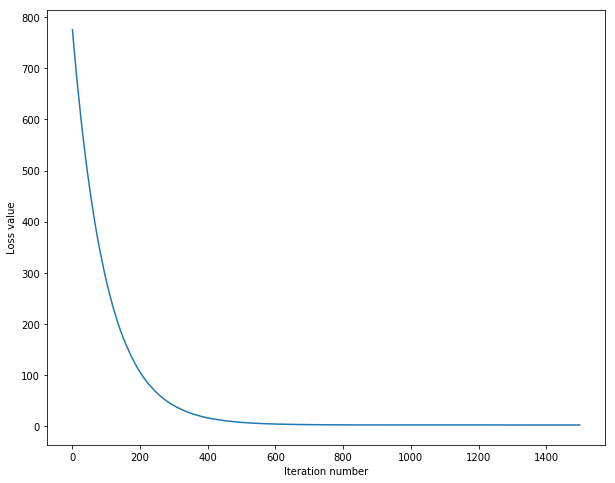

In [292]:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [293]:
y_train_pred = svm.predict(x_train)
print('Training accuracy: %f' % (np.mean(y_train == y_train_pred)))

y_val_pred = svm.predict(x_val)
print('Validation accuracy: %f' % (np.mean(y_val == y_val_pred)))

Training accuracy: 0.187796
Validation accuracy: 0.184000


### Cross Validation

In [296]:
learning_rates = [1e-7, 2e-7, 4e-7, 7e-7, 1e-6, 2e-6, 3e-6]
regularization_strengths = [1e4, 2e4, 4e4, 6e4, 8e4, 1e5]

results = {}
best_val = -1
best_softmax = None

for lr in learning_rates:
    for reg in regularization_strengths:
        softmax = Softmax()
        softmax.train(x_train, y_train, learning_rate = lr, reg = reg, num_iters = 1500, verbose = True)
        
        y_train_pred = softmax.predict(x_train)
        y_val_pred = softmax.predict(x_val)
        
        accuracy_train = np.mean(y_train == y_train_pred)
        accuracy_val = np.mean(y_val == y_val_pred)
        
        results[(lr, reg)] = (accuracy_train, accuracy_val)
        
        if accuracy_val > best_val:
            best_val = accuracy_val
            best_softmax = softmax

for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %d reg %e train accuracy: %f accuracy: %f' % (lr, reg, train_accuracy, val_accuracy))

print('Best validation accuracy achieved during cross-validation: %f' % best_val)

Iteration 0 / 1500:loss 159.171928
Iteration 100 / 1500:loss 129.177381
Iteration 200 / 1500:loss 105.695581
Iteration 300 / 1500:loss 86.294279
Iteration 400 / 1500:loss 71.037368
Iteration 500 / 1500:loss 58.375214
Iteration 600 / 1500:loss 48.024476
Iteration 700 / 1500:loss 39.688274
Iteration 800 / 1500:loss 32.699052
Iteration 900 / 1500:loss 27.004484
Iteration 1000 / 1500:loss 22.601794
Iteration 1100 / 1500:loss 18.720100
Iteration 1200 / 1500:loss 15.733487
Iteration 1300 / 1500:loss 13.162325
Iteration 1400 / 1500:loss 11.061064
Iteration 0 / 1500:loss 310.691778
Iteration 100 / 1500:loss 207.736419
Iteration 200 / 1500:loss 139.092245
Iteration 300 / 1500:loss 93.840225
Iteration 400 / 1500:loss 63.428560
Iteration 500 / 1500:loss 42.945412
Iteration 600 / 1500:loss 29.425931
Iteration 700 / 1500:loss 20.369324
Iteration 800 / 1500:loss 14.238264
Iteration 900 / 1500:loss 10.237546
Iteration 1000 / 1500:loss 7.528267
Iteration 1100 / 1500:loss 5.654568
Iteration 1200 / 1500

Iteration 500 / 1500:loss 2.038802
Iteration 600 / 1500:loss 2.143161
Iteration 700 / 1500:loss 2.057524
Iteration 800 / 1500:loss 2.060884
Iteration 900 / 1500:loss 2.135064
Iteration 1000 / 1500:loss 2.122350
Iteration 1100 / 1500:loss 2.104688
Iteration 1200 / 1500:loss 2.090210
Iteration 1300 / 1500:loss 2.109605
Iteration 1400 / 1500:loss 2.099830
Iteration 0 / 1500:loss 1243.550823
Iteration 100 / 1500:loss 3.972837
Iteration 200 / 1500:loss 2.156561
Iteration 300 / 1500:loss 2.123994
Iteration 400 / 1500:loss 2.104464
Iteration 500 / 1500:loss 2.064724
Iteration 600 / 1500:loss 2.115112
Iteration 700 / 1500:loss 2.104411
Iteration 800 / 1500:loss 2.111779
Iteration 900 / 1500:loss 2.140656
Iteration 1000 / 1500:loss 2.151052
Iteration 1100 / 1500:loss 2.143792
Iteration 1200 / 1500:loss 2.053056
Iteration 1300 / 1500:loss 2.155272
Iteration 1400 / 1500:loss 2.075893
Iteration 0 / 1500:loss 1525.535641
Iteration 100 / 1500:loss 2.610690
Iteration 200 / 1500:loss 2.171749
Iteratio

Iteration 1200 / 1500:loss 1.991519
Iteration 1300 / 1500:loss 2.001879
Iteration 1400 / 1500:loss 1.958193
Iteration 0 / 1500:loss 314.222863
Iteration 100 / 1500:loss 2.153371
Iteration 200 / 1500:loss 2.163233
Iteration 300 / 1500:loss 2.044493
Iteration 400 / 1500:loss 2.117310
Iteration 500 / 1500:loss 1.902661
Iteration 600 / 1500:loss 2.065674
Iteration 700 / 1500:loss 1.954314
Iteration 800 / 1500:loss 2.038353
Iteration 900 / 1500:loss 2.096240
Iteration 1000 / 1500:loss 2.025611
Iteration 1100 / 1500:loss 2.078302
Iteration 1200 / 1500:loss 2.035046
Iteration 1300 / 1500:loss 2.031584
Iteration 1400 / 1500:loss 1.985334
Iteration 0 / 1500:loss 619.457210
Iteration 100 / 1500:loss 2.033003
Iteration 200 / 1500:loss 2.076505
Iteration 300 / 1500:loss 2.045883
Iteration 400 / 1500:loss 2.159986
Iteration 500 / 1500:loss 2.098088
Iteration 600 / 1500:loss 2.072272
Iteration 700 / 1500:loss 2.024141
Iteration 800 / 1500:loss 2.083445
Iteration 900 / 1500:loss 2.058449
Iteration 10

In [298]:
y_test_pred = best_softmax.predict(x_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('Softmax on raw pixels final test set accuracy: %f' % (test_accuracy))

Softmax on raw pixels final test set accuracy: 0.368900


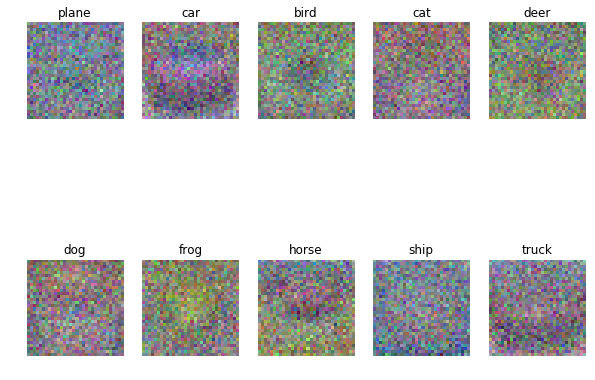

In [299]:
w = best_softmax.W[:-1, :]
w = w.reshape(32, 32, 3, 10)

w_min, w_max = np.min(w), np.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i + 1)
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])

## Two-Layer-Net

In [7]:
def rel_error(x, y):
    '''return relative error'''
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [10]:
class TwoLayerNet(object):
    '''
    A two-layer fully neural network. The net has an input dimension of N, a hidden layer dimension H, and
    performs classification over C classes. We train the network with a softmax loss funciton and L2 
    regularization on the weight matrices. THe network uses a ReLU nonlinearity after the first fully connected 
    layer.
    In other words, the network has the following architecture:
    input - fully connected layer - ReLU - fully connected layer - softmax
    The outputs of the second fully-connected layer are the scores for each class.
    '''
    def __init__(self, input_size, hidden_size, output_size, std = 1e-4):
        '''
        Initialize the model. Weights are initialized to small random values and biases are initialized to
        zero. Weights and biases are stored in the variable self.params, which is a dictionary with the 
        following keys:
        W1: First layer weights; has shape (D, H)
        b1: Frist layer biases; has shape (H, )
        W2: Second layer weights; has shape (H, C)
        b2: Second layer biases; has shape (C, )
        
        Inputs:
        - input_size: The dimension D of the input data.
        - hidden_size: The number of neurons H in the hidden layer.
        - output_size: The number of classes C.
        '''
        self.params = {}
        self.params['W1'] = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)
        self.params['b2'] = np.zeros(output_size)
    
    def loss(self, x, y = None, reg = 0.0):
        '''
        Compute the loss and gradients for a two layer fully connected neural network.
        Inputs:
        - x: Input data of shape (N, D).
        - y: Vector of training labels.
        - reg: Regularization strength.
        Returns:
        If y is None return a matrix scores of shape (N, C).
        If y is not None, instead return a tuple of :
        - loss: Loss for this batch of training samples;
        - grads: Dictionary mapping parameter names to gradients of those parameters with respect to the loss 
          function; hase the same keys as self.params.
        '''
        # Unpack variables form the param dictionary
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        N, D = x.shape
        
        #Compute the forward pass
        scores = None
        layer_1 = np.dot(x, W1) + b1
        layer_1[layer_1 < 0] = 0
        layer_2 = np.dot(layer_1, W2) + b2
        scores = layer_2
        
        if y is None:
            return scores
        
        #Compute the loss
        loss = None
        f = scores - np.max(scores, axis = 1)[:, np.newaxis]
        p = np.exp(f) / np.sum(np.exp(f), axis = 1)[:, np.newaxis]
        loss = -np.sum(np.log(p[range(N), y])) / N
        
        loss += 0.5 * reg * (np.sum(W1 * W1) + np.sum(W2 * W2))
        
        #Compute gradients
        grads = {}
        df = p
        df[range(N), y] -= 1
        df /= N
        db2 = np.sum(df, axis = 0)
        dW2 = np.dot(layer_1.T, df)
        
        dReLU = np.dot(df, W2.T)
        dlayer_1 = dReLU
        dlayer_1[layer_1 == 0] = 0
        
        db1 = np.sum(dlayer_1, axis = 0)
        dW1 = np.dot(x.T, dlayer_1)
        
        dW1 += reg * W1
        dW2 += reg * W2
        
        grads['W1'] = dW1
        grads['W2'] = dW2
        grads['b1'] = db1
        grads['b2'] = db2
        
        return loss, grads
    
    def train(self, x, y, x_val, y_val, learning_rate = 1e-3, learning_rate_decay = 0.95, 
             reg = 1e-5, num_iters = 100, batch_size = 200, verbose = False):
        '''
        Train this neural network using stochastic gradient descent.
        Inputs:
        - x: A numpy array of shape (N, D) giving training data.
        - y: A numpy array of shape (N, ) giving training labels.
        - x_val: A numpy array of shape (N_val, D) giving validation data.
        - y_val: A numpy array of shape (N_val, ) giving validation labels.
        - learning_rate: Scalar giving learning rate for optimization.
        - learning_rate_decay: Scalar giving factor used to decay the learning rate after each epoch.
        - reg: Scalar giving regularization strength.
        - num_iters: Number of steps to take when optimizing.
        - verbose: boolean; if true print progress during optimization.
        '''
        num_train = x.shape[0]
        iterations_per_epoch = max(round(num_train / batch_size), 1)
        
        #Use SGD to optimize the parameters in self.model
        loss_history = []
        train_acc_history = []
        val_acc_history = []
        
        for it in range(num_iters):
            batch_choice = np.random.choice(num_train, batch_size, replace = True)
            
            x_batch = x[batch_choice, :]
            y_batch = y[batch_choice]
            
            loss, grads = self.loss(x_batch, y = y_batch, reg = reg)
            loss_history.append(loss)
            
            self.params['W1'] -= learning_rate * grads['W1']
            self.params['b1'] -= learning_rate * grads['b1']
            self.params['W2'] -= learning_rate * grads['W2']
            self.params['b2'] -= learning_rate * grads['b2']
            
            if verbose and it % 100 ==0:
                print('Iteration %d / %d: loss %f' % (it, num_iters, loss))
            
            if it % iterations_per_epoch == 0:
                train_acc = (self.predict(x_batch) == y_batch).mean()
                val_acc = (self.predict(x_val) == y_val).mean()
                train_acc_history.append(train_acc)
                val_acc_history.append(val_acc)
                
                learning_rate *= learning_rate_decay
                
        return {
            'loss_history': loss_history, 
            'train_acc_history': train_acc_history, 
            'val_acc_history': val_acc_history
        }
    
    
    def predict(self, x):
        '''
        Use the trained weights of this two-layer network to predict labels for data points. For each 
        data point we predict scores for each of the C classes, and assign each data point to the class
        with the highest score.
        Inputs:
        - x: A numpy array of shape (N, D) giving N D-dimensional data points to classify.
        Returns:
        - y_pred: A numpy array of shape (N, ) giving predicted labels for each of the elements of x.
        '''
        layer_1 = np.dot(x, self.params['W1']) + self.params['b1']
        layer_1[layer_1 < 0] = 0
        layer_2 = np.dot(layer_1, self.params['W2']) + self.params['b2']
        y_pred = np.argmax(layer_2, axis = 1)
        
        return y_pred
        

In [15]:
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std = 1e-1)

def init_toy_data():
    np.random.seed(1)
    x = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return x, y

net = init_toy_model()
x, y = init_toy_data()

### Forward pass: compute scores

In [10]:
scores = net.loss(x)
print('Your scores:')
print(scores)
print('\n')
print('correct scores:')
correct_scores = np.asarray([
    [-0.81233741, -1.27654624, -0.70335995], 
    [-0.17129677, -1.18803311, -0.47310444], 
    [-0.51590475, -1.01354314, -0.8504215], 
    [-0.15419291, -0.48629638, -0.52901952], 
    [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print('\n')

print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]


correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]


Difference between your scores and correct scores:
3.68027207459e-08


### Forward pass: compute loss

In [11]:
loss, _ = net.loss(x, y, reg = 0.1)
correct_loss = 1.30378789133

print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.79856129989e-13


### Backward pass

In [12]:
def eval_numerical_gradient(f, x, verbose = True, h = 0.00001):
    '''
    a naive implementaion of numerical gradient fo f at x
    - f should be a funciton that takes a singele argument
    - x is the point (numpy array) to evaluate the gradient at
    '''
    fx = f(x)
    grad = np.zeros_like(x)
    it = np.nditer(x, flags = ['multi_index'], op_flags = ['readwrite'])
    while not it.finished:
        ix = it.multi_index
        oldval = x[ix]
        x[ix] = oldval + h
        fxph = f(x)
        x[ix] = oldval - h
        fxmh = f(x)
        x[ix] = oldval
        
        grad[ix] = (fxph - fxmh) / (2 * h)
        if verbose:
            print(ix, grad[ix])
        it.iternext()
    return grad

In [13]:
loss, grads = net.loss(x, y, reg = 0.1)

for param_name in grads:
    f = lambda W: net.loss(x, y, reg = 0.1)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose = False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

b2 max relative error: 4.447625e-11
b1 max relative error: 2.738421e-09
W2 max relative error: 3.440708e-09
W1 max relative error: 3.561318e-09


### Train the network

Final training loss:  0.0171496079387


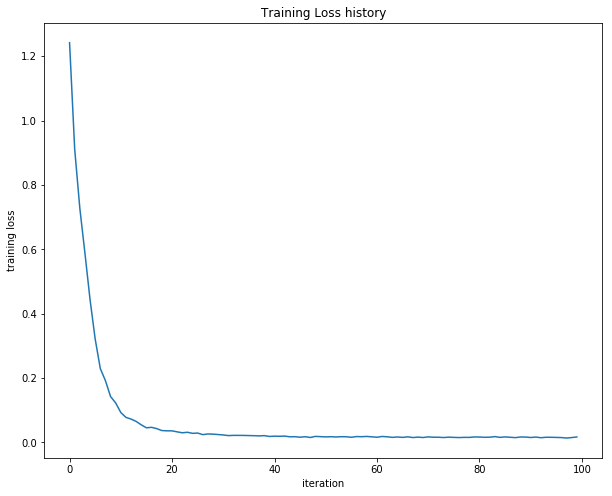

In [14]:
net = init_toy_model()
stats = net.train(x, y, x, y, learning_rate = 1e-1, reg = 1e-5, num_iters = 100, verbose = False)

print('Final training loss: ', stats['loss_history'][-1])

plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

### Load the data

In [15]:
def get_CIFAR10_data(num_training = 49000, num_validation = 1000, num_test = 1000):
    '''
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare it for the two-layer neural net 
    classifier. These are the same steps as we used for the SVM, but condensed tor a single function
    '''
    cifar10_dir = data_path
    x_train, y_train, x_test, y_test = load_CIFAR10(cifar10_dir)
    
    mask = range(num_training, num_training + num_validation)
    x_val = x_train[mask]
    y_val = y_train[mask]
    
    mask = range(num_training)
    x_train = x_train[mask]
    y_train = y_train[mask]
    
    mask = range(num_test)
    x_test = x_test[mask]
    y_test = y_test[mask]
    
    x_train = np.reshape(x_train, (x_train.shape[0], -1))
    x_val = np.reshape(x_val, (x_val.shape[0], -1))
    x_test = np.reshape(x_test, (x_test.shape[0], -1))
    
    mean_image = np.mean(x_train, axis = 0)
    x_train -= mean_image
    x_val -= mean_image
    x_test -= mean_image
    
    return x_train, y_train, x_val, y_val, x_test, y_test

x_train, y_train, x_val, y_val, x_test, y_test = get_CIFAR10_data()

print('Train data shape:', x_train.shape)
print('Train labels shape:', y_train.shape)
print('Validation data shape:', x_val.shape)
print('Validation labels shape:', y_val.shape)
print('Test data shape:', x_test.shape)
print('Test labels shape:', y_test.shape)

Train data shape: (49000, 3072)
Train labels shape: (49000,)
Validation data shape: (1000, 3072)
Validation labels shape: (1000,)
Test data shape: (1000, 3072)
Test labels shape: (1000,)


### Train a network

In [16]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)
stats = net.train(x_train, y_train, x_val, y_val, num_iters = 5000, batch_size = 200, learning_rate = 1e-4, 
                 learning_rate_decay = 0.95, reg = 0.5, verbose = True)

val_acc = (net.predict(x_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

Iteration 0 / 5000: loss 2.302954
Iteration 100 / 5000: loss 2.302550
Iteration 200 / 5000: loss 2.297648
Iteration 300 / 5000: loss 2.259602
Iteration 400 / 5000: loss 2.204170
Iteration 500 / 5000: loss 2.118565
Iteration 600 / 5000: loss 2.051535
Iteration 700 / 5000: loss 1.988466
Iteration 800 / 5000: loss 2.006591
Iteration 900 / 5000: loss 1.951473
Iteration 1000 / 5000: loss 1.945960
Iteration 1100 / 5000: loss 1.941880
Iteration 1200 / 5000: loss 1.951769
Iteration 1300 / 5000: loss 1.963396
Iteration 1400 / 5000: loss 1.883262
Iteration 1500 / 5000: loss 1.877572
Iteration 1600 / 5000: loss 1.869816
Iteration 1700 / 5000: loss 1.777291
Iteration 1800 / 5000: loss 1.878781
Iteration 1900 / 5000: loss 1.910383
Iteration 2000 / 5000: loss 1.795530
Iteration 2100 / 5000: loss 1.777655
Iteration 2200 / 5000: loss 1.843159
Iteration 2300 / 5000: loss 1.884577
Iteration 2400 / 5000: loss 1.784586
Iteration 2500 / 5000: loss 1.696669
Iteration 2600 / 5000: loss 1.656541
Iteration 270

### Debug the training

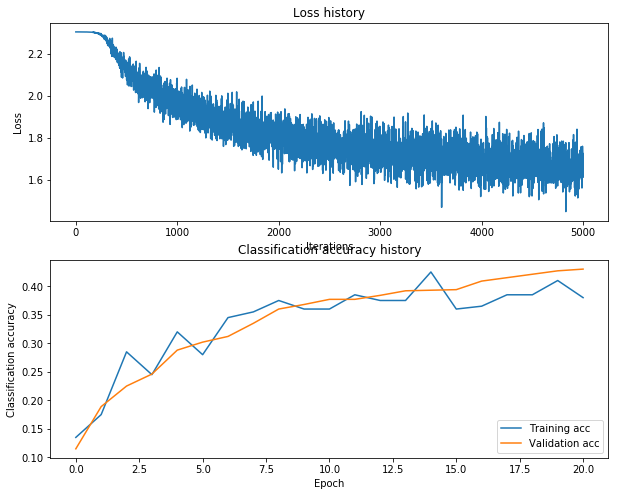

In [17]:
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label = 'train')
plt.plot(stats['val_acc_history'], label = 'val')
plt.legend(['Training acc', 'Validation acc'], loc = 'lower right')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.show()

In [18]:
def visualize_grid(xs, ubound = 255.0, padding = 1):
    '''
    Reshape a 4D tensor fo image data to a grid for easy visualization.
    Inputs:
    - xs: Data of shape (N, H, W, C).
    - ubound: Output grid widd have values scaled to the range [0, bound].
    - padding: The number of blank pixels between elements of the grid.
    '''
    (N, H, W, C) = xs.shape
    grid_size = int(ceil(sqrt(N)))
    grid_height = H * grid_size + padding * (grid_size - 1)
    grid_width = W * grid_size + padding * (grid_size - 1)
    grid = np.zeros((grid_height, grid_width, C))
    next_idx = 0
    y0, y1 = 0, H
    for y in range(grid_size):
        x0, x1 = 0, W
        for x in range(grid_size):
            if next_idx < N:
                img = xs[next_idx]
                low, high = np.min(img), np.max(img)
                grid[y0: y1, x0: x1] =  ubound * (img - low) / (high - low)
                next_idx += 1
            x0 += W + padding
            x1 += W + padding
        y0 += H + padding
        y1 += H + padding
    return grid

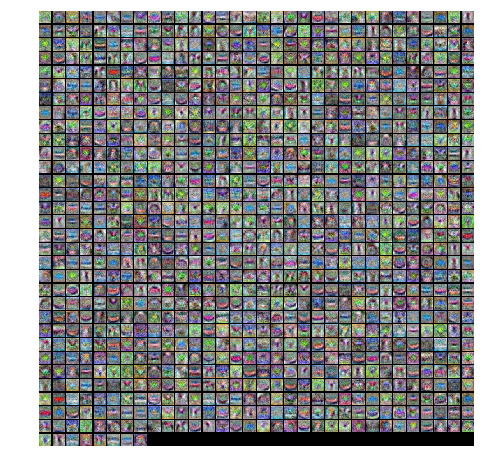

In [26]:
def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding = 3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

### Tune your hyperparameters

In [20]:
best_net = None
best_val_acc = 0

input_size = 32 * 32 * 3
num_classes = 10

hidden_sizes = [50, 100, 200, 500, 1000]
learning_rates = [1e-4, 2e-4, 5e-4, 1e-3, 2e-3, 5e-3]
learning_rate_decays = [0.99, 0.95, 0.9, 0.8, 0.5]
regs = [5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1.0]

for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:
        for reg in regs:
            for learning_rate_decay in learning_rate_decays:
                net = TwoLayerNet(input_size, hidden_size, num_classes)
                stats = net.train(x_train, y_train, x_val, y_val, num_iters = 5000, 
                                  batch_size = 200, learning_rate = learning_rate, 
                                  learning_rate_decay = learning_rate_decay, 
                                  reg = reg, verbose = False)
                val_acc = (net.predict(x_val) == y_val).mean()
                print('Hidden size: %d' % hidden_size)
                print('Learning rate: %e' % learning_rate)
                print('Regularization strength: %e' % reg)
                print('Learning rate decay: %02f' % learning_rate_decay)
                print('Validation accuracy: %04f' % val_acc)
                if val_acc > best_val_acc:
                    best_net = net
                    best_val_acc = val_acc
                    best_net_stats = stats

Hidden size: 50
Learning rate: 1.000000e-04
Regularization strength: 5.000000e-03
Learning rate decay: 9.900000e-01
Validation accuracy: 4.530000e-01
Hidden size: 50
Learning rate: 1.000000e-04
Regularization strength: 5.000000e-03
Learning rate decay: 9.500000e-01
Validation accuracy: 4.350000e-01
Hidden size: 50
Learning rate: 1.000000e-04
Regularization strength: 5.000000e-03
Learning rate decay: 9.000000e-01
Validation accuracy: 3.840000e-01
Hidden size: 50
Learning rate: 1.000000e-04
Regularization strength: 5.000000e-03
Learning rate decay: 8.000000e-01
Validation accuracy: 2.940000e-01
Hidden size: 50
Learning rate: 1.000000e-04
Regularization strength: 5.000000e-03
Learning rate decay: 5.000000e-01
Validation accuracy: 1.570000e-01
Hidden size: 50
Learning rate: 1.000000e-04
Regularization strength: 1.000000e-02
Learning rate decay: 9.900000e-01
Validation accuracy: 4.630000e-01
Hidden size: 50
Learning rate: 1.000000e-04
Regularization strength: 1.000000e-02
Learning rate deca

Hidden size: 50
Learning rate: 2.000000e-04
Regularization strength: 1.000000e+00
Learning rate decay: 9.900000e-01
Validation accuracy: 4.720000e-01
Hidden size: 50
Learning rate: 2.000000e-04
Regularization strength: 1.000000e+00
Learning rate decay: 9.500000e-01
Validation accuracy: 4.780000e-01
Hidden size: 50
Learning rate: 2.000000e-04
Regularization strength: 1.000000e+00
Learning rate decay: 9.000000e-01
Validation accuracy: 4.510000e-01
Hidden size: 50
Learning rate: 2.000000e-04
Regularization strength: 1.000000e+00
Learning rate decay: 8.000000e-01
Validation accuracy: 3.810000e-01
Hidden size: 50
Learning rate: 2.000000e-04
Regularization strength: 1.000000e+00
Learning rate decay: 5.000000e-01
Validation accuracy: 2.330000e-01
Hidden size: 50
Learning rate: 5.000000e-04
Regularization strength: 5.000000e-03
Learning rate decay: 9.900000e-01
Validation accuracy: 5.120000e-01
Hidden size: 50
Learning rate: 5.000000e-04
Regularization strength: 5.000000e-03
Learning rate deca

Hidden size: 50
Learning rate: 1.000000e-03
Regularization strength: 5.000000e-01
Learning rate decay: 9.900000e-01
Validation accuracy: 4.910000e-01
Hidden size: 50
Learning rate: 1.000000e-03
Regularization strength: 5.000000e-01
Learning rate decay: 9.500000e-01
Validation accuracy: 5.170000e-01
Hidden size: 50
Learning rate: 1.000000e-03
Regularization strength: 5.000000e-01
Learning rate decay: 9.000000e-01
Validation accuracy: 5.100000e-01
Hidden size: 50
Learning rate: 1.000000e-03
Regularization strength: 5.000000e-01
Learning rate decay: 8.000000e-01
Validation accuracy: 4.930000e-01
Hidden size: 50
Learning rate: 1.000000e-03
Regularization strength: 5.000000e-01
Learning rate decay: 5.000000e-01
Validation accuracy: 4.010000e-01
Hidden size: 50
Learning rate: 1.000000e-03
Regularization strength: 1.000000e+00
Learning rate decay: 9.900000e-01
Validation accuracy: 5.050000e-01
Hidden size: 50
Learning rate: 1.000000e-03
Regularization strength: 1.000000e+00
Learning rate deca

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in subtract
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:160: RuntimeWarning: invalid value encountered in less


Hidden size: 50
Learning rate: 5.000000e-03
Regularization strength: 5.000000e-03
Learning rate decay: 9.900000e-01
Validation accuracy: 8.700000e-02
Hidden size: 50
Learning rate: 5.000000e-03
Regularization strength: 5.000000e-03
Learning rate decay: 9.500000e-01
Validation accuracy: 8.700000e-02
Hidden size: 50
Learning rate: 5.000000e-03
Regularization strength: 5.000000e-03
Learning rate decay: 9.000000e-01
Validation accuracy: 2.860000e-01
Hidden size: 50
Learning rate: 5.000000e-03
Regularization strength: 5.000000e-03
Learning rate decay: 8.000000e-01
Validation accuracy: 2.550000e-01
Hidden size: 50
Learning rate: 5.000000e-03
Regularization strength: 5.000000e-03
Learning rate decay: 5.000000e-01
Validation accuracy: 4.990000e-01
Hidden size: 50
Learning rate: 5.000000e-03
Regularization strength: 1.000000e-02
Learning rate decay: 9.900000e-01
Validation accuracy: 8.700000e-02
Hidden size: 50
Learning rate: 5.000000e-03
Regularization strength: 1.000000e-02
Learning rate deca

Hidden size: 100
Learning rate: 1.000000e-04
Regularization strength: 1.000000e+00
Learning rate decay: 9.900000e-01
Validation accuracy: 4.580000e-01
Hidden size: 100
Learning rate: 1.000000e-04
Regularization strength: 1.000000e+00
Learning rate decay: 9.500000e-01
Validation accuracy: 4.370000e-01
Hidden size: 100
Learning rate: 1.000000e-04
Regularization strength: 1.000000e+00
Learning rate decay: 9.000000e-01
Validation accuracy: 3.760000e-01
Hidden size: 100
Learning rate: 1.000000e-04
Regularization strength: 1.000000e+00
Learning rate decay: 8.000000e-01
Validation accuracy: 3.060000e-01
Hidden size: 100
Learning rate: 1.000000e-04
Regularization strength: 1.000000e+00
Learning rate decay: 5.000000e-01
Validation accuracy: 1.820000e-01
Hidden size: 100
Learning rate: 2.000000e-04
Regularization strength: 5.000000e-03
Learning rate decay: 9.900000e-01
Validation accuracy: 5.050000e-01
Hidden size: 100
Learning rate: 2.000000e-04
Regularization strength: 5.000000e-03
Learning ra

Hidden size: 100
Learning rate: 5.000000e-04
Regularization strength: 5.000000e-01
Learning rate decay: 9.900000e-01
Validation accuracy: 5.060000e-01
Hidden size: 100
Learning rate: 5.000000e-04
Regularization strength: 5.000000e-01
Learning rate decay: 9.500000e-01
Validation accuracy: 5.130000e-01
Hidden size: 100
Learning rate: 5.000000e-04
Regularization strength: 5.000000e-01
Learning rate decay: 9.000000e-01
Validation accuracy: 4.970000e-01
Hidden size: 100
Learning rate: 5.000000e-04
Regularization strength: 5.000000e-01
Learning rate decay: 8.000000e-01
Validation accuracy: 4.680000e-01
Hidden size: 100
Learning rate: 5.000000e-04
Regularization strength: 5.000000e-01
Learning rate decay: 5.000000e-01
Validation accuracy: 3.390000e-01
Hidden size: 100
Learning rate: 5.000000e-04
Regularization strength: 1.000000e+00
Learning rate decay: 9.900000e-01
Validation accuracy: 5.100000e-01
Hidden size: 100
Learning rate: 5.000000e-04
Regularization strength: 1.000000e+00
Learning ra

Hidden size: 100
Learning rate: 2.000000e-03
Regularization strength: 1.000000e-01
Learning rate decay: 9.900000e-01
Validation accuracy: 4.770000e-01
Hidden size: 100
Learning rate: 2.000000e-03
Regularization strength: 1.000000e-01
Learning rate decay: 9.500000e-01
Validation accuracy: 5.220000e-01
Hidden size: 100
Learning rate: 2.000000e-03
Regularization strength: 1.000000e-01
Learning rate decay: 9.000000e-01
Validation accuracy: 5.310000e-01
Hidden size: 100
Learning rate: 2.000000e-03
Regularization strength: 1.000000e-01
Learning rate decay: 8.000000e-01
Validation accuracy: 5.410000e-01
Hidden size: 100
Learning rate: 2.000000e-03
Regularization strength: 1.000000e-01
Learning rate decay: 5.000000e-01
Validation accuracy: 4.710000e-01
Hidden size: 100
Learning rate: 2.000000e-03
Regularization strength: 5.000000e-01
Learning rate decay: 9.900000e-01
Validation accuracy: 4.990000e-01
Hidden size: 100
Learning rate: 2.000000e-03
Regularization strength: 5.000000e-01
Learning ra

Hidden size: 200
Learning rate: 1.000000e-04
Regularization strength: 5.000000e-02
Learning rate decay: 9.900000e-01
Validation accuracy: 4.640000e-01
Hidden size: 200
Learning rate: 1.000000e-04
Regularization strength: 5.000000e-02
Learning rate decay: 9.500000e-01
Validation accuracy: 4.410000e-01
Hidden size: 200
Learning rate: 1.000000e-04
Regularization strength: 5.000000e-02
Learning rate decay: 9.000000e-01
Validation accuracy: 3.840000e-01
Hidden size: 200
Learning rate: 1.000000e-04
Regularization strength: 5.000000e-02
Learning rate decay: 8.000000e-01
Validation accuracy: 3.110000e-01
Hidden size: 200
Learning rate: 1.000000e-04
Regularization strength: 5.000000e-02
Learning rate decay: 5.000000e-01
Validation accuracy: 1.980000e-01
Hidden size: 200
Learning rate: 1.000000e-04
Regularization strength: 1.000000e-01
Learning rate decay: 9.900000e-01
Validation accuracy: 4.660000e-01
Hidden size: 200
Learning rate: 1.000000e-04
Regularization strength: 1.000000e-01
Learning ra

Hidden size: 200
Learning rate: 5.000000e-04
Regularization strength: 1.000000e-02
Learning rate decay: 9.900000e-01
Validation accuracy: 5.350000e-01
Hidden size: 200
Learning rate: 5.000000e-04
Regularization strength: 1.000000e-02
Learning rate decay: 9.500000e-01
Validation accuracy: 5.370000e-01
Hidden size: 200
Learning rate: 5.000000e-04
Regularization strength: 1.000000e-02
Learning rate decay: 9.000000e-01
Validation accuracy: 5.130000e-01
Hidden size: 200
Learning rate: 5.000000e-04
Regularization strength: 1.000000e-02
Learning rate decay: 8.000000e-01
Validation accuracy: 4.710000e-01
Hidden size: 200
Learning rate: 5.000000e-04
Regularization strength: 1.000000e-02
Learning rate decay: 5.000000e-01
Validation accuracy: 3.410000e-01
Hidden size: 200
Learning rate: 5.000000e-04
Regularization strength: 5.000000e-02
Learning rate decay: 9.900000e-01
Validation accuracy: 5.170000e-01
Hidden size: 200
Learning rate: 5.000000e-04
Regularization strength: 5.000000e-02
Learning ra

Hidden size: 200
Learning rate: 2.000000e-03
Regularization strength: 5.000000e-03
Learning rate decay: 9.900000e-01
Validation accuracy: 5.130000e-01
Hidden size: 200
Learning rate: 2.000000e-03
Regularization strength: 5.000000e-03
Learning rate decay: 9.500000e-01
Validation accuracy: 5.110000e-01
Hidden size: 200
Learning rate: 2.000000e-03
Regularization strength: 5.000000e-03
Learning rate decay: 9.000000e-01
Validation accuracy: 5.650000e-01
Hidden size: 200
Learning rate: 2.000000e-03
Regularization strength: 5.000000e-03
Learning rate decay: 8.000000e-01
Validation accuracy: 5.350000e-01
Hidden size: 200
Learning rate: 2.000000e-03
Regularization strength: 5.000000e-03
Learning rate decay: 5.000000e-01
Validation accuracy: 4.710000e-01
Hidden size: 200
Learning rate: 2.000000e-03
Regularization strength: 1.000000e-02
Learning rate decay: 9.900000e-01
Validation accuracy: 5.110000e-01
Hidden size: 200
Learning rate: 2.000000e-03
Regularization strength: 1.000000e-02
Learning ra

Hidden size: 200
Learning rate: 5.000000e-03
Regularization strength: 1.000000e+00
Learning rate decay: 9.900000e-01
Validation accuracy: 8.700000e-02
Hidden size: 200
Learning rate: 5.000000e-03
Regularization strength: 1.000000e+00
Learning rate decay: 9.500000e-01
Validation accuracy: 8.700000e-02
Hidden size: 200
Learning rate: 5.000000e-03
Regularization strength: 1.000000e+00
Learning rate decay: 9.000000e-01
Validation accuracy: 3.980000e-01
Hidden size: 200
Learning rate: 5.000000e-03
Regularization strength: 1.000000e+00
Learning rate decay: 8.000000e-01
Validation accuracy: 4.590000e-01
Hidden size: 200
Learning rate: 5.000000e-03
Regularization strength: 1.000000e+00
Learning rate decay: 5.000000e-01
Validation accuracy: 4.890000e-01
Hidden size: 500
Learning rate: 1.000000e-04
Regularization strength: 5.000000e-03
Learning rate decay: 9.900000e-01
Validation accuracy: 4.680000e-01
Hidden size: 500
Learning rate: 1.000000e-04
Regularization strength: 5.000000e-03
Learning ra

Hidden size: 500
Learning rate: 2.000000e-04
Regularization strength: 5.000000e-01
Learning rate decay: 9.900000e-01
Validation accuracy: 5.050000e-01
Hidden size: 500
Learning rate: 2.000000e-04
Regularization strength: 5.000000e-01
Learning rate decay: 9.500000e-01
Validation accuracy: 4.830000e-01
Hidden size: 500
Learning rate: 2.000000e-04
Regularization strength: 5.000000e-01
Learning rate decay: 9.000000e-01
Validation accuracy: 4.720000e-01
Hidden size: 500
Learning rate: 2.000000e-04
Regularization strength: 5.000000e-01
Learning rate decay: 8.000000e-01
Validation accuracy: 3.960000e-01
Hidden size: 500
Learning rate: 2.000000e-04
Regularization strength: 5.000000e-01
Learning rate decay: 5.000000e-01
Validation accuracy: 2.580000e-01
Hidden size: 500
Learning rate: 2.000000e-04
Regularization strength: 1.000000e+00
Learning rate decay: 9.900000e-01
Validation accuracy: 4.820000e-01
Hidden size: 500
Learning rate: 2.000000e-04
Regularization strength: 1.000000e+00
Learning ra

Hidden size: 500
Learning rate: 1.000000e-03
Regularization strength: 1.000000e-01
Learning rate decay: 9.900000e-01
Validation accuracy: 5.180000e-01
Hidden size: 500
Learning rate: 1.000000e-03
Regularization strength: 1.000000e-01
Learning rate decay: 9.500000e-01
Validation accuracy: 5.620000e-01
Hidden size: 500
Learning rate: 1.000000e-03
Regularization strength: 1.000000e-01
Learning rate decay: 9.000000e-01
Validation accuracy: 5.620000e-01
Hidden size: 500
Learning rate: 1.000000e-03
Regularization strength: 1.000000e-01
Learning rate decay: 8.000000e-01
Validation accuracy: 5.180000e-01
Hidden size: 500
Learning rate: 1.000000e-03
Regularization strength: 1.000000e-01
Learning rate decay: 5.000000e-01
Validation accuracy: 4.300000e-01
Hidden size: 500
Learning rate: 1.000000e-03
Regularization strength: 5.000000e-01
Learning rate decay: 9.900000e-01
Validation accuracy: 5.460000e-01
Hidden size: 500
Learning rate: 1.000000e-03
Regularization strength: 5.000000e-01
Learning ra

Hidden size: 500
Learning rate: 5.000000e-03
Regularization strength: 5.000000e-02
Learning rate decay: 9.900000e-01
Validation accuracy: 8.700000e-02
Hidden size: 500
Learning rate: 5.000000e-03
Regularization strength: 5.000000e-02
Learning rate decay: 9.500000e-01
Validation accuracy: 8.700000e-02
Hidden size: 500
Learning rate: 5.000000e-03
Regularization strength: 5.000000e-02
Learning rate decay: 9.000000e-01
Validation accuracy: 4.510000e-01
Hidden size: 500
Learning rate: 5.000000e-03
Regularization strength: 5.000000e-02
Learning rate decay: 8.000000e-01
Validation accuracy: 4.810000e-01
Hidden size: 500
Learning rate: 5.000000e-03
Regularization strength: 5.000000e-02
Learning rate decay: 5.000000e-01
Validation accuracy: 5.240000e-01
Hidden size: 500
Learning rate: 5.000000e-03
Regularization strength: 1.000000e-01
Learning rate decay: 9.900000e-01
Validation accuracy: 8.700000e-02
Hidden size: 500
Learning rate: 5.000000e-03
Regularization strength: 1.000000e-01
Learning ra

Hidden size: 1000
Learning rate: 2.000000e-04
Regularization strength: 1.000000e-02
Learning rate decay: 9.900000e-01
Validation accuracy: 5.260000e-01
Hidden size: 1000
Learning rate: 2.000000e-04
Regularization strength: 1.000000e-02
Learning rate decay: 9.500000e-01
Validation accuracy: 4.870000e-01
Hidden size: 1000
Learning rate: 2.000000e-04
Regularization strength: 1.000000e-02
Learning rate decay: 9.000000e-01
Validation accuracy: 4.750000e-01
Hidden size: 1000
Learning rate: 2.000000e-04
Regularization strength: 1.000000e-02
Learning rate decay: 8.000000e-01
Validation accuracy: 4.110000e-01
Hidden size: 1000
Learning rate: 2.000000e-04
Regularization strength: 1.000000e-02
Learning rate decay: 5.000000e-01
Validation accuracy: 2.770000e-01
Hidden size: 1000
Learning rate: 2.000000e-04
Regularization strength: 5.000000e-02
Learning rate decay: 9.900000e-01
Validation accuracy: 5.260000e-01
Hidden size: 1000
Learning rate: 2.000000e-04
Regularization strength: 5.000000e-02
Lear

Hidden size: 1000
Learning rate: 5.000000e-04
Regularization strength: 1.000000e+00
Learning rate decay: 5.000000e-01
Validation accuracy: 3.650000e-01
Hidden size: 1000
Learning rate: 1.000000e-03
Regularization strength: 5.000000e-03
Learning rate decay: 9.900000e-01
Validation accuracy: 5.300000e-01
Hidden size: 1000
Learning rate: 1.000000e-03
Regularization strength: 5.000000e-03
Learning rate decay: 9.500000e-01
Validation accuracy: 5.640000e-01
Hidden size: 1000
Learning rate: 1.000000e-03
Regularization strength: 5.000000e-03
Learning rate decay: 9.000000e-01
Validation accuracy: 5.560000e-01
Hidden size: 1000
Learning rate: 1.000000e-03
Regularization strength: 5.000000e-03
Learning rate decay: 8.000000e-01
Validation accuracy: 5.230000e-01
Hidden size: 1000
Learning rate: 1.000000e-03
Regularization strength: 5.000000e-03
Learning rate decay: 5.000000e-01
Validation accuracy: 4.430000e-01
Hidden size: 1000
Learning rate: 1.000000e-03
Regularization strength: 1.000000e-02
Lear

Hidden size: 1000
Learning rate: 2.000000e-03
Regularization strength: 5.000000e-01
Learning rate decay: 8.000000e-01
Validation accuracy: 5.530000e-01
Hidden size: 1000
Learning rate: 2.000000e-03
Regularization strength: 5.000000e-01
Learning rate decay: 5.000000e-01
Validation accuracy: 4.710000e-01
Hidden size: 1000
Learning rate: 2.000000e-03
Regularization strength: 1.000000e+00
Learning rate decay: 9.900000e-01
Validation accuracy: 5.020000e-01
Hidden size: 1000
Learning rate: 2.000000e-03
Regularization strength: 1.000000e+00
Learning rate decay: 9.500000e-01
Validation accuracy: 5.320000e-01
Hidden size: 1000
Learning rate: 2.000000e-03
Regularization strength: 1.000000e+00
Learning rate decay: 9.000000e-01
Validation accuracy: 5.560000e-01
Hidden size: 1000
Learning rate: 2.000000e-03
Regularization strength: 1.000000e+00
Learning rate decay: 8.000000e-01
Validation accuracy: 5.350000e-01
Hidden size: 1000
Learning rate: 2.000000e-03
Regularization strength: 1.000000e+00
Lear

NameError: name 'best_al_acc' is not defined

In [21]:
print('Best validation accuracy: ', best_val_acc)

Best validation accuracy:  0.576


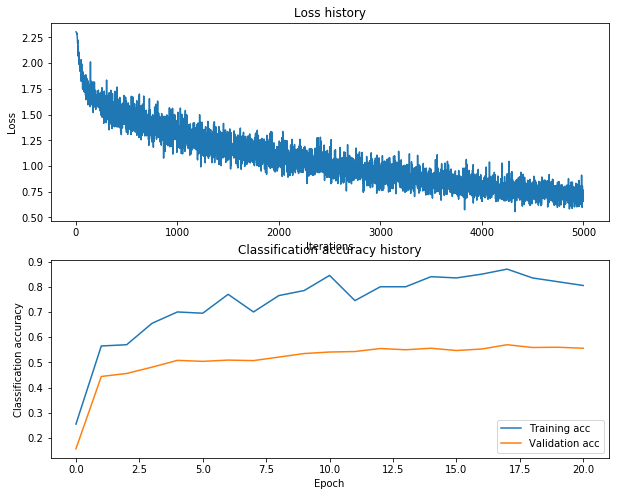

In [22]:
plt.subplot(2, 1, 1)
plt.plot(best_net_stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(best_net_stats['train_acc_history'], label = 'train')
plt.plot(best_net_stats['val_acc_history'], label = 'val')
plt.legend(['Training acc', 'Validation acc'], loc = 'lower right')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.show()

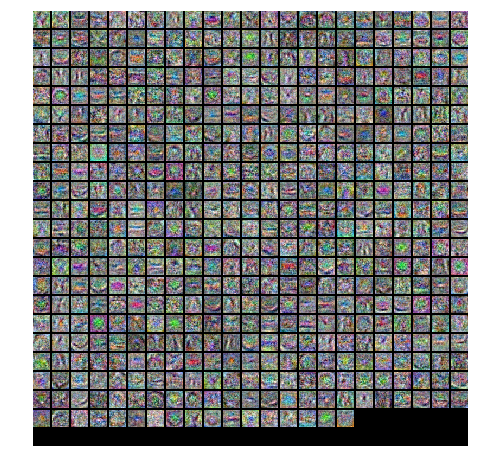

In [27]:
show_net_weights(best_net)

### Run on the test set

In [28]:
test_acc = (best_net.predict(x_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.535


## Image Features

In [12]:
def get_CIFAR10_data(num_training = 49000, num_validation = 1000, num_test = 1000):
    x_train, y_train, x_test, y_test = load_CIFAR10(data_path)
    
    mask = range(num_training, num_training + num_validation)
    x_val = x_train[mask]
    y_val = y_train[mask]
    
    mask = range(num_training)
    x_train = x_train[mask]
    y_train = y_train[mask]
    
    mask = range(num_test)
    x_test = x_test[mask]
    y_test = y_test[mask]
    
    return x_train, y_train, x_val, y_val, x_test, y_test

x_train, y_train, x_val, y_val, x_test, y_test = get_CIFAR10_data()

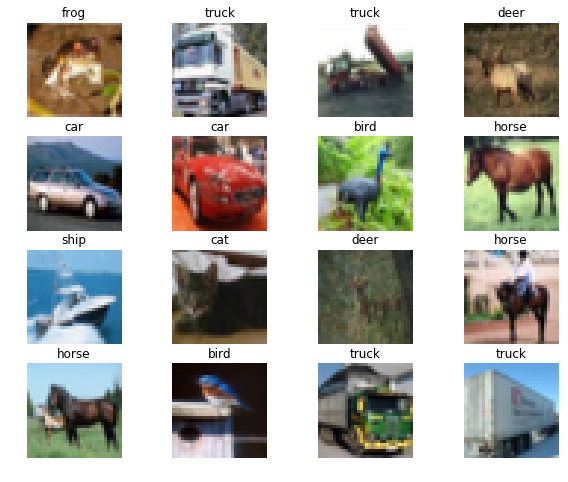

In [13]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i].astype('uint8'))
    plt.title(classes[y_train[i]])
    plt.axis('off')
plt.show()

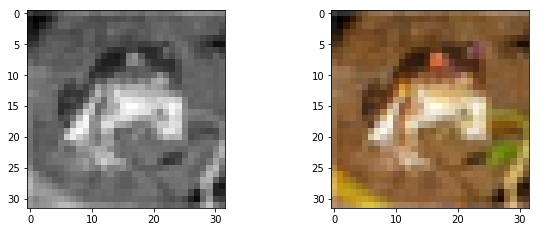

In [14]:
im = np.squeeze(x_train[0])
image = np.dot(im[..., :3], [0.299, 0.587, 0.144])
plt.subplot(2, 2, 1)
plt.imshow(image)

plt.subplot(2, 2, 2)
plt.imshow(im.astype('uint8'))
plt.show()

In [15]:
def extract_features(imgs, feature_fns, verbose = False):
    '''
    Given pixel data for images and several feature functions that operate on single images, apply all 
    feature functions to all images, concatenating the feature vectors for each image and storing the 
    features for all images in a single matrix.
    Inputs:
    - imgs: N x H x W x C array of pixel data for N images.
    - feature_fns: List of k feature functions. The ith featurefunction should take as input an 
      H x W x D array and return a (one-dimensional) array of length F_i.
    - verbose: Boolean; if true, print progress.
    Returns:
    An array of shape (N, F_1 + ... + F_k) where each column is the concatenation of all features for a 
    single image.
    '''
    num_images = imgs.shape[0]
    if num_images == 0:
        return np.array([])
    
    feature_dims = []
    first_image_features = []
    for feature_fn in feature_fns:
        feats = feature_fn(imgs[0].squeeze())
        assert len(feats.shape) == 1, 'Feature functions must be one-dimensional'
        feature_dims.append(feats.size)
        first_image_features.append(feats)
        
    total_feature_dim = sum(feature_dims)
    imgs_features = np.zeros((num_images, total_feature_dim))
    imgs_features[0] = np.hstack(first_image_features).T
    
    for i in range(1, num_images):
        idx = 0
        for feature_fn, feature_dim in zip(feature_fns, feature_dims):
            next_idx  = idx + feature_dim
            imgs_features[i, idx: next_idx] = feature_fn(imgs[i].squeeze())
            idx = next_idx
        if verbose and i % 1000 == 0:
            print('Done extracting features for %d / %d images' % (i, num_images))
    
    return imgs_features

def rgb2gray(rgb):
    '''
    Convert RGB image to grayscale
    Parameters:
        rgb: RGB image
    Returns:
        gray: grayscale image
    '''
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.144])

def hog_feature(im):
    '''
    Compute Histogram of Gradient (HOG) feature for an image.
        Modified form skimage.feature.hog
        http://pydoc/net/Python/scikits-image/0.4.2/skimage.feature.hog
        
        Reference:
        Histograms of Oriented Gradients for Human Detection
        Navneet Dalal and Bill Triggs, CVPR 2005
    Parameters:
    - im: an input grayscale or rgb image
    Returns:
    - feat: Histogram of Gradient (HOG) feature
    '''
    if im.ndim == 3:
        image = rgb2gray(im)
    else:
        image = np.atleast_2d(im)
    
    sx, sy = image.shape
    orientations = 9
    cx, cy = (8, 8)
    
    gx = np.zeros(image.shape)
    gy = np.zeros(image.shape)
    gx[:, :-1] = np.diff(image, n = 1, axis = 1)
    gy[:-1, :] = np.diff(image, n = 1, axis = 0)
    grad_mag = np.sqrt(gx ** 2 + gy ** 2)
    grad_ori = np.arctan2(gy, (gx + 1e-15)) * (180 / np.pi) + 90
    
    n_cellsx = int(np.floor(sx / cx))
    n_cellsy = int(np.floor(sy / cy))
    
    orientation_histogram = np.zeros((n_cellsx, n_cellsy, orientations))
    for i in range(orientations):
        temp_ori = np.where(grad_ori < 180 / orientations * (i + 1), grad_ori, 0)
        temp_ori = np.where(grad_ori >= 180 / orientations * i, temp_ori, 0)
        cond2 = temp_ori > 0
        temp_mag = np.where(cond2, grad_mag, 0)
        orientation_histogram[:, :, i] = uniform_filter(temp_mag, size = (cx, cy))[cx // 2 :: cx, cy // 2 :: cy].T
    
    return orientation_histogram.ravel()

def color_histogram_hsv(im, nbin = 10, xmin = 0, xmax = 255, normalized = True):
    '''
    Compute color histogram for an image using hue.
    Inputs:
    - im: H x W x C array of pixel data for an RGB image.
    - nbin: Number of histogram bins.
    - xmin: Minimum pixel value.
    - xmax: Maxmum pixel value.
    - normalized: Whether to normalize the histogram.
    Returns:
    1D vector of length nbin giving the color histogram over the hue of the input image.
    '''
    ndim = im.ndim
    bins = np.linspace(xmin, xmax, nbin + 1)
    hsv = matplotlib.colors.rgb_to_hsv(im / xmax) * xmax
    imhist, bin_edges = np.histogram(hsv[:, :, 0], bins = bins, density = normalized)
    imhist = imhist * np.diff(bin_edges)
    
    return imhist

### Extract Features

In [16]:
num_color_bins = 10
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin = num_color_bins)]
x_train_feats = extract_features(x_train, feature_fns, verbose = True)
x_val_feats = extract_features(x_val, feature_fns)
x_test_feats = extract_features(x_test, feature_fns)

mean_feat = np.mean(x_train_feats, axis = 0, keepdims = True)
x_train_feats -= mean_feat
x_val_feats -= mean_feat
x_test_feats -= mean_feat

std_feat = np.std(x_train_feats, axis = 0, keepdims = True)
x_train_feats /= std_feat
x_val_feats /= std_feat
x_test_feats /= std_feat

x_train_feats = np.hstack([x_train_feats, np.ones((x_train_feats.shape[0], 1))])
x_val_feats = np.hstack([x_val_feats, np.ones((x_val_feats.shape[0], 1))])
x_test_feats = np.hstack([x_test_feats, np.ones((x_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

### Train SVM on Features

In [38]:
learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [1e5, 1e6, 1e7]

results = {}
best_val = -1
best_svm = None

for lr in learning_rates:
    for reg in regularization_strengths:
        svm = LinearSVM()
        svm.train(x_train_feats, y_train, learning_rate = lr, reg = reg, num_iters = 1500, verbose = False)
        
        y_train_pred = svm.predict(x_train_feats)
        y_val_pred = svm.predict(x_val_feats)
        
        accuracy_train = np.mean(y_train == y_train_pred)
        accuracy_val = np.mean(y_val == y_val_pred)
        
        results[(lr, reg)] = (accuracy_train, accuracy_val)
        
        if accuracy_val > best_val:
            best_val = accuracy_val
            best_svm = svm

for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (lr, reg, train_accuracy, val_accuracy))
print('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 1.000000e-09 reg 1.000000e+05 train accuracy: 0.112694 val accuracy: 0.106000
lr 1.000000e-09 reg 1.000000e+06 train accuracy: 0.094490 val accuracy: 0.095000
lr 1.000000e-09 reg 1.000000e+07 train accuracy: 0.412490 val accuracy: 0.408000
lr 1.000000e-08 reg 1.000000e+05 train accuracy: 0.082837 val accuracy: 0.078000
lr 1.000000e-08 reg 1.000000e+06 train accuracy: 0.414673 val accuracy: 0.408000
lr 1.000000e-08 reg 1.000000e+07 train accuracy: 0.414714 val accuracy: 0.416000
lr 1.000000e-07 reg 1.000000e+05 train accuracy: 0.412469 val accuracy: 0.413000
lr 1.000000e-07 reg 1.000000e+06 train accuracy: 0.410000 val accuracy: 0.415000
lr 1.000000e-07 reg 1.000000e+07 train accuracy: 0.335939 val accuracy: 0.348000
best validation accuracy achieved during cross-validation: 0.416000


In [39]:
y_test_pred = best_svm.predict(x_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.426


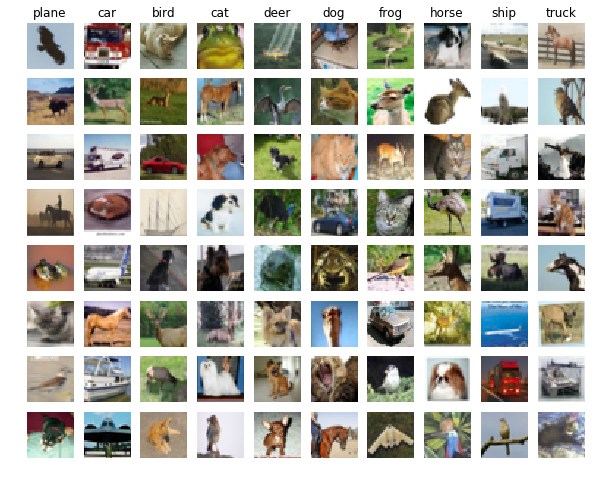

In [41]:
examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace = False)
    for  i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(x_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Neural Network on Image Features

In [17]:
print(x_train_feats.shape)

(49000, 155)


In [18]:
input_dim = x_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

best_net = None
best_val_acc = 0
val_acc_record = {}

learning_rates = [1e-4, 2e-4, 5e-4, 1e-3, 2e-3, 5e-3]
learning_rate_decays = [0.99, 0.95, 0.9, 0.8, 0.5]
regs = [5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1.0]

for learning_rate in learning_rates:
    for reg in regs:
        for learning_rate_decay in learning_rate_decays:
            net = TwoLayerNet(input_dim, hidden_dim, num_classes)
            stats = net.train(x_train_feats, y_train, x_val_feats, y_val, num_iters = 5000, 
                             batch_size = 128, learning_rate = learning_rate, 
                             learning_rate_decay = learning_rate_decay, 
                             reg = reg, verbose = False)
            val_acc = (net.predict(x_val_feats) == y_val).mean()
            val_acc_record[(learning_rate, reg, learning_rate_decay)] = val_acc
            print('Learning rate: %e' % learning_rate)
            print('Regularization strength: %e' % reg)
            print('Learning rate decay: %02f' % learning_rate_decay)
            print('Validation accuracy: %04f' % val_acc)
            if val_acc > best_val_acc:
                best_net = net
                best_val_acc = val_acc
                best_net_stats = stats

Learning rate: 1.000000e-04
Regularization strength: 5.000000e-03
Learning rate decay: 0.990000
Validation accuracy: 0.207000
Learning rate: 1.000000e-04
Regularization strength: 5.000000e-03
Learning rate decay: 0.950000
Validation accuracy: 0.221000
Learning rate: 1.000000e-04
Regularization strength: 5.000000e-03
Learning rate decay: 0.900000
Validation accuracy: 0.151000
Learning rate: 1.000000e-04
Regularization strength: 5.000000e-03
Learning rate decay: 0.800000
Validation accuracy: 0.143000
Learning rate: 1.000000e-04
Regularization strength: 5.000000e-03
Learning rate decay: 0.500000
Validation accuracy: 0.124000
Learning rate: 1.000000e-04
Regularization strength: 1.000000e-02
Learning rate decay: 0.990000
Validation accuracy: 0.237000
Learning rate: 1.000000e-04
Regularization strength: 1.000000e-02
Learning rate decay: 0.950000
Validation accuracy: 0.175000
Learning rate: 1.000000e-04
Regularization strength: 1.000000e-02
Learning rate decay: 0.900000
Validation accuracy: 0

Learning rate: 5.000000e-04
Regularization strength: 1.000000e-02
Learning rate decay: 0.950000
Validation accuracy: 0.361000
Learning rate: 5.000000e-04
Regularization strength: 1.000000e-02
Learning rate decay: 0.900000
Validation accuracy: 0.303000
Learning rate: 5.000000e-04
Regularization strength: 1.000000e-02
Learning rate decay: 0.800000
Validation accuracy: 0.268000
Learning rate: 5.000000e-04
Regularization strength: 1.000000e-02
Learning rate decay: 0.500000
Validation accuracy: 0.148000
Learning rate: 5.000000e-04
Regularization strength: 5.000000e-02
Learning rate decay: 0.990000
Validation accuracy: 0.393000
Learning rate: 5.000000e-04
Regularization strength: 5.000000e-02
Learning rate decay: 0.950000
Validation accuracy: 0.337000
Learning rate: 5.000000e-04
Regularization strength: 5.000000e-02
Learning rate decay: 0.900000
Validation accuracy: 0.355000
Learning rate: 5.000000e-04
Regularization strength: 5.000000e-02
Learning rate decay: 0.800000
Validation accuracy: 0

Learning rate: 2.000000e-03
Regularization strength: 5.000000e-02
Learning rate decay: 0.900000
Validation accuracy: 0.437000
Learning rate: 2.000000e-03
Regularization strength: 5.000000e-02
Learning rate decay: 0.800000
Validation accuracy: 0.412000
Learning rate: 2.000000e-03
Regularization strength: 5.000000e-02
Learning rate decay: 0.500000
Validation accuracy: 0.269000
Learning rate: 2.000000e-03
Regularization strength: 1.000000e-01
Learning rate decay: 0.990000
Validation accuracy: 0.478000
Learning rate: 2.000000e-03
Regularization strength: 1.000000e-01
Learning rate decay: 0.950000
Validation accuracy: 0.487000
Learning rate: 2.000000e-03
Regularization strength: 1.000000e-01
Learning rate decay: 0.900000
Validation accuracy: 0.438000
Learning rate: 2.000000e-03
Regularization strength: 1.000000e-01
Learning rate decay: 0.800000
Validation accuracy: 0.415000
Learning rate: 2.000000e-03
Regularization strength: 1.000000e-01
Learning rate decay: 0.500000
Validation accuracy: 0

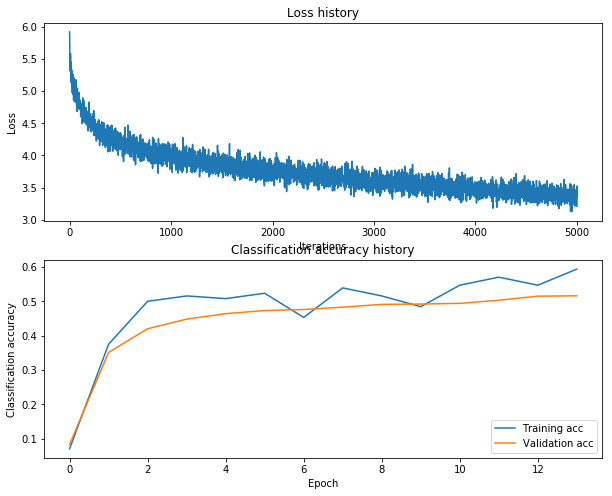

In [19]:
plt.subplot(2, 1, 1)
plt.plot(best_net_stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(best_net_stats['train_acc_history'], label = 'train')
plt.plot(best_net_stats['val_acc_history'], label = 'val')
plt.legend(['Training acc', 'Validation acc'], loc = 'lower right')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.show()

In [20]:
test_acc = (best_net.predict(x_test_feats) == y_test).mean()
print(test_acc)

0.512
